# Income Prediction Practise

# Imports

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas.plotting import scatter_matrix
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")

# Working with training data

In [8]:
train_set = pd.read_csv('adult.data',names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class'], header = 0, na_values="?")
train_set.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [9]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [10]:
train_set.shape

(32560, 15)

In [11]:
train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [12]:
def categorical_feature(dataframe, threshold_value):
    categorical_features = []
    for col in dataframe.columns:
            if len(dataframe[col].unique())<=threshold_value or dataframe[col].dtypes == 'object':
                    #print(f'{col}:{dataframe[col].unique()}: {dataframe[col].dtypes}')
                    categorical_features.append(col)
            else:
                    continue             
    return categorical_features   

In [13]:
categorical_feature(train_set, 20)

['workclass',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class']

In [14]:
categorical_feature_list = categorical_feature(train_set, 20)
categorical_feature_list

['workclass',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class']

In [15]:
for col in categorical_feature_list:
    print(f'{col}:{train_set[col].unique()}: {train_set[col].dtypes}')

workclass:[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']: object
education:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']: object
education_num:[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]: int64
marital_status:[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']: object
occupation:[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']: object
relationship:[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']: object
race:[' White' ' Black' ' Asian-Pac-Islander' ' Amer

# Data Visualization

https://stackoverflow.com/questions/60596102/seaborn-selected-kde-bandwidth-is-0-cannot-estimate-density

In [10]:
def data_visualization(dataframe,categorical_feature_list,cols=5, width=20, height=30, hspace=0.2, wspace=0.5):
    #Use matplotlib style settings from a style specification.
    plt.style.use('fivethirtyeight')   
    #Create a new figure
    fig = plt.figure(figsize=(width,height)) 
    # customizing the subplots
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataframe.shape[1]) / cols)
    # iterating over the columns and then showing the data distribution in various columns
    
    for i, column in enumerate(dataframe.columns):
        
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if column not in categorical_feature_list:
            # with out using the following parameters:
            #hist = False, rug = True, rug_kws = {'color' : 'r'}, kde_kws = {'bw' : 1}
            #we will run into error: RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density
            #refer link: https://stackoverflow.com/questions/60596102/seaborn-selected-kde-bandwidth-is-0-cannot-estimate-density
            g = sns.distplot(dataframe[column],hist = False, rug = True, rug_kws = {'color' : 'r'}, kde_kws = {'bw' : 1})
            
            plt.xlabel(column,fontsize=12)
            plt.xticks(rotation=25)
        else:
            g = sns.countplot(y=column, data=dataframe)
            if column == 'education' or column == 'occupation' or column == 'education_num' or column == 'native_country':
                 plt.yticks(rotation=0)
            else:        
                 plt.yticks(rotation=25)
    #plt.tight_layout()        

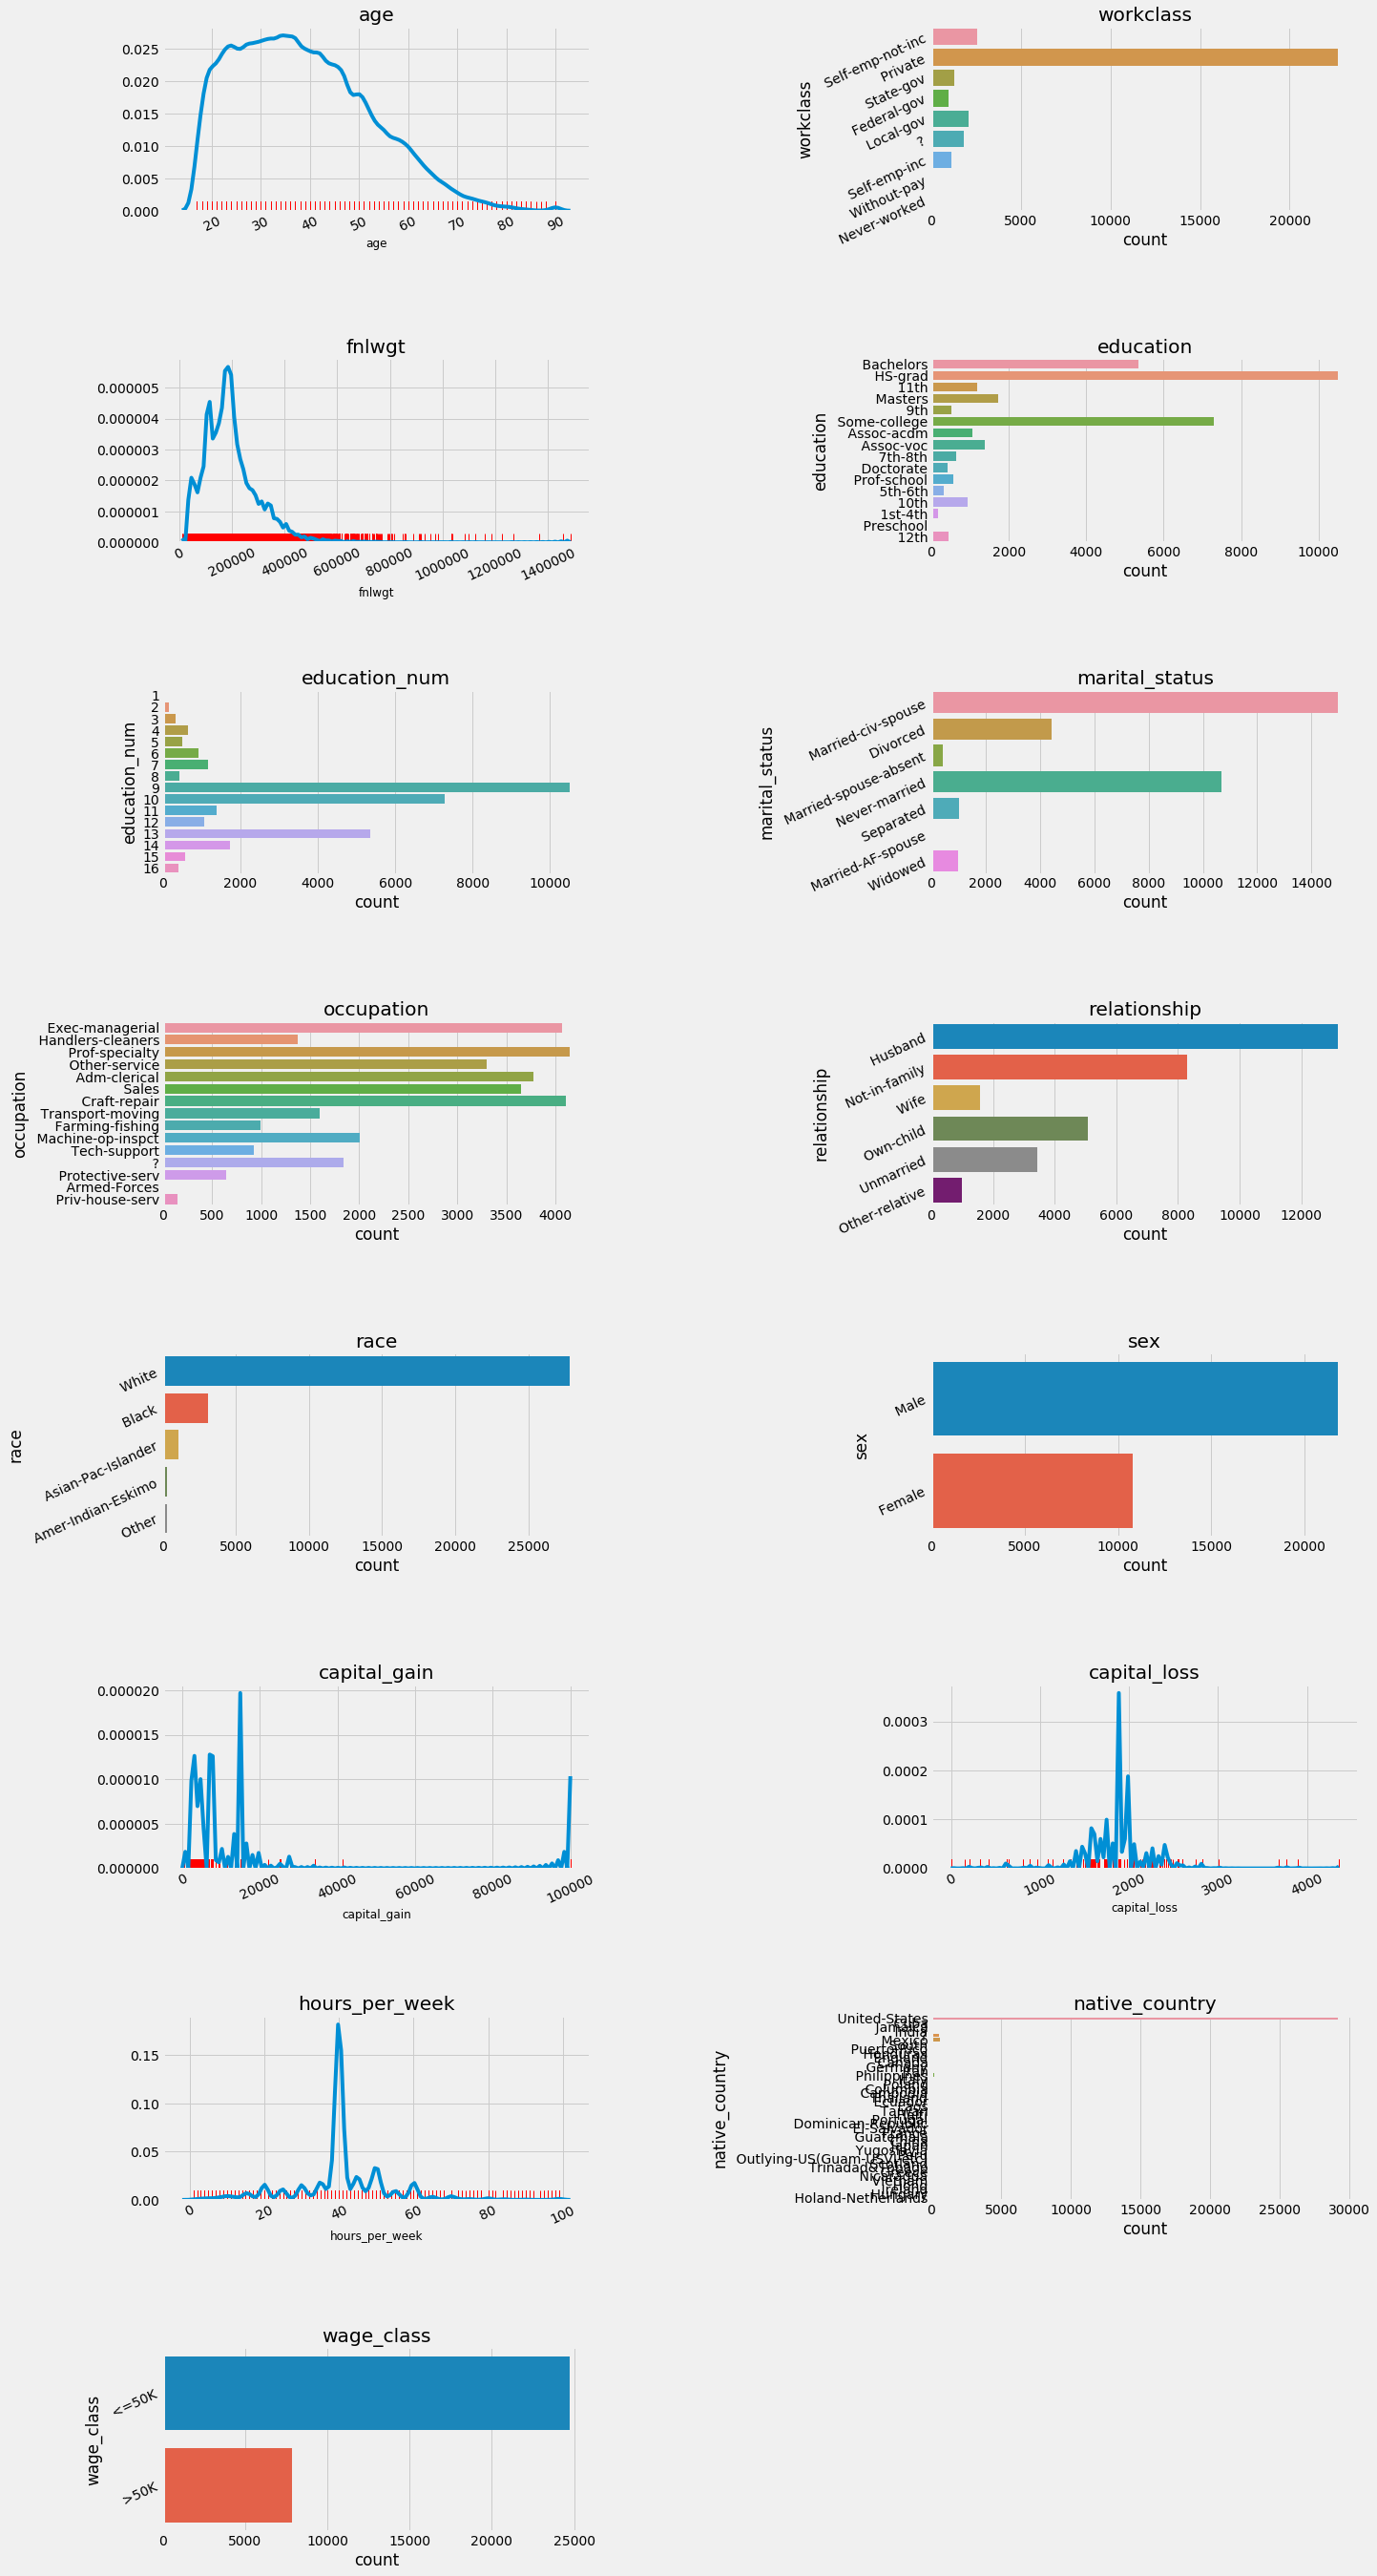

In [11]:
data_visualization(train_set,categorical_feature_list,cols=2, width=20, height=45, hspace=0.8, wspace=0.8)

In the figure above, the plot for Native country column is not clear. So, we'll plot it separately again

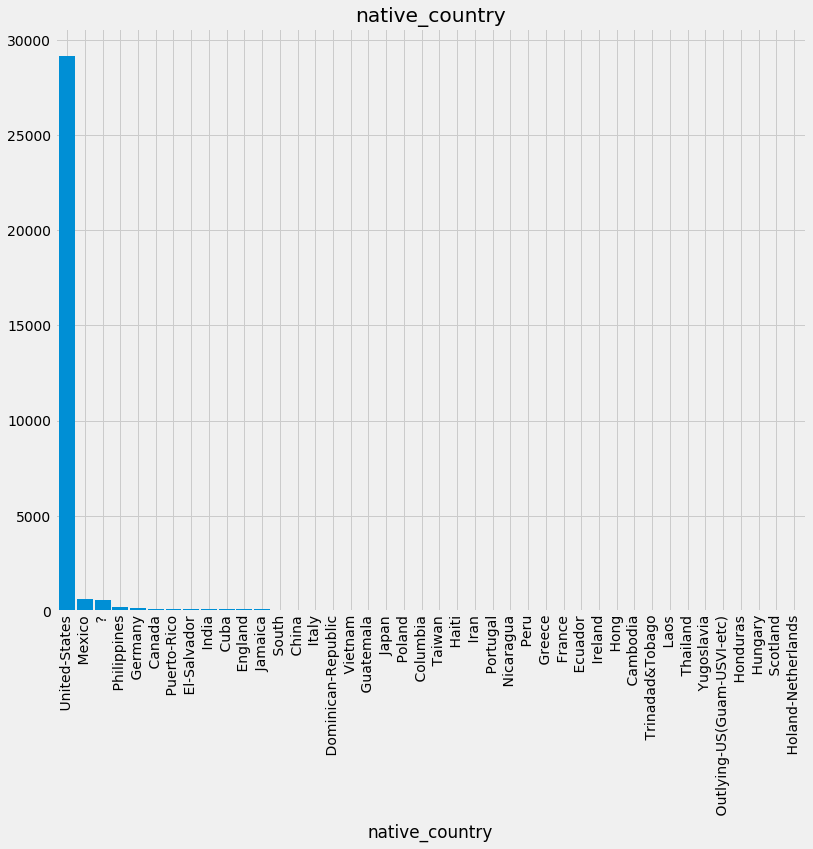

In [12]:
by_country = train_set.groupby(['native_country'])['native_country'].count().sort_values(ascending = False) # groupby year
by_country.plot(kind='bar', figsize=(12,10), width=0.9, title='native_country') # returning the figure grouped by year

# Replacing the '?' in the dataset with NaN --  Not Required

train_set = train_set.apply(lambda x : x.replace(' ?',np.nan))

train_set.isnull().sum()

# Coverting/Encoding categorical value in object type columns with numerical values

In [13]:
def encoder(dataframe):
    df = dataframe.copy()
    for column in df.columns:
        if df[column].dtypes == 'object':
            length_of_unique_value_set = list(range(df[column].nunique()))
            value_set = list(df[column].unique())
            temp_mapping_dict = dict(zip(value_set,length_of_unique_value_set))
            df[column] = df[column].map(temp_mapping_dict)
    return df        

#testing
length_of_unique_value_set = list(range(train_set['sex'].nunique()))
value_set = list(train_set['sex'].unique())
temp_mapping_dict = dict(zip(value_set,length_of_unique_value_set))
temp_mapping_dict

In [14]:
train_set = encoder(train_set)

In [15]:
for col in categorical_feature_list:
    print(f'{col}:{train_set[col].unique()}: {train_set[col].dtypes}')

workclass:[0 1 2 3 4 5 6 7 8]: int64
education:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]: int64
education_num:[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]: int64
marital_status:[0 1 2 3 4 5 6]: int64
occupation:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]: int64
relationship:[0 1 2 3 4 5]: int64
race:[0 1 2 3 4]: int64
sex:[0 1]: int64
native_country:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]: int64
wage_class:[0 1]: int64


In [16]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,0,83311,0,13,0,0,0,0,0,0,0,13,0,0
1,38,1,215646,1,9,1,1,1,0,0,0,0,40,0,0
2,53,1,234721,2,7,0,1,0,1,0,0,0,40,0,0
3,28,1,338409,0,13,0,2,2,1,1,0,0,40,1,0
4,37,1,284582,3,14,0,0,2,0,1,0,0,40,0,0


In [17]:
train_set.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.614619,1.897818e+05,3.424570,10.080590,1.458784,4.734275,1.392291,0.221714,0.330805,1077.615172,87.306511,40.437469,1.290356,0.240817
std,13.640642,1.490557,1.055498e+05,3.453582,2.572709,1.622263,3.329518,1.535159,0.627357,0.470510,7385.402999,402.966116,12.347618,5.045446,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,1.178315e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.000000,1.783630e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,1.000000,2.370545e+05,5.000000,12.000000,3.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [18]:
train_set.groupby('wage_class')['wage_class'].count()/train_set.shape[0]

wage_class
0    0.759183
1    0.240817
Name: wage_class, dtype: float64

<b>Therefore its a imbalanced dataset of 76% less than <=50k and 24% more than >=50k</b>

# Data Vistuation with Groupbyt with target column

<b>Testing with one column</b>

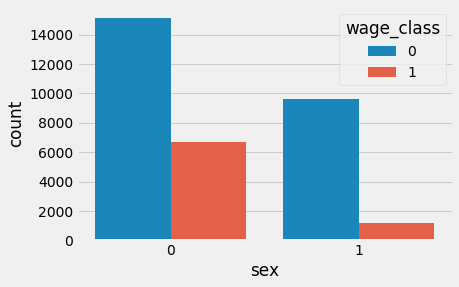

In [19]:
by_sex = train_set.groupby(['sex','wage_class'])['wage_class'].count()
sns.countplot('sex',data=train_set,hue='wage_class')

# Data Visualization of Categorical columns groupby Target

In [20]:
def data_visualization_groupby_target(dataframe,categorical_feature_list,cols=5, width=20, height=30, hspace=0.2, wspace=0.5):
    #Use matplotlib style settings from a style specification.
    plt.style.use('fivethirtyeight')     
    #Create a new figure
    fig = plt.figure(figsize=(width,height)) 
    # customizing the subplots
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(len(categorical_feature_list)) / cols)
    # iterating over the columns and then showing the data distribution in various columns
    
    for i, column in enumerate(categorical_feature_list):
        
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        #temp_df = dataframe.groupby([column,'wage_class'])['wage_class'].count()
        g = sns.countplot(column,data=dataframe,hue='wage_class')
        plt.xlabel(column,fontsize=12)
        plt.xticks(rotation=90)
        
    #plt.tight_layout()        

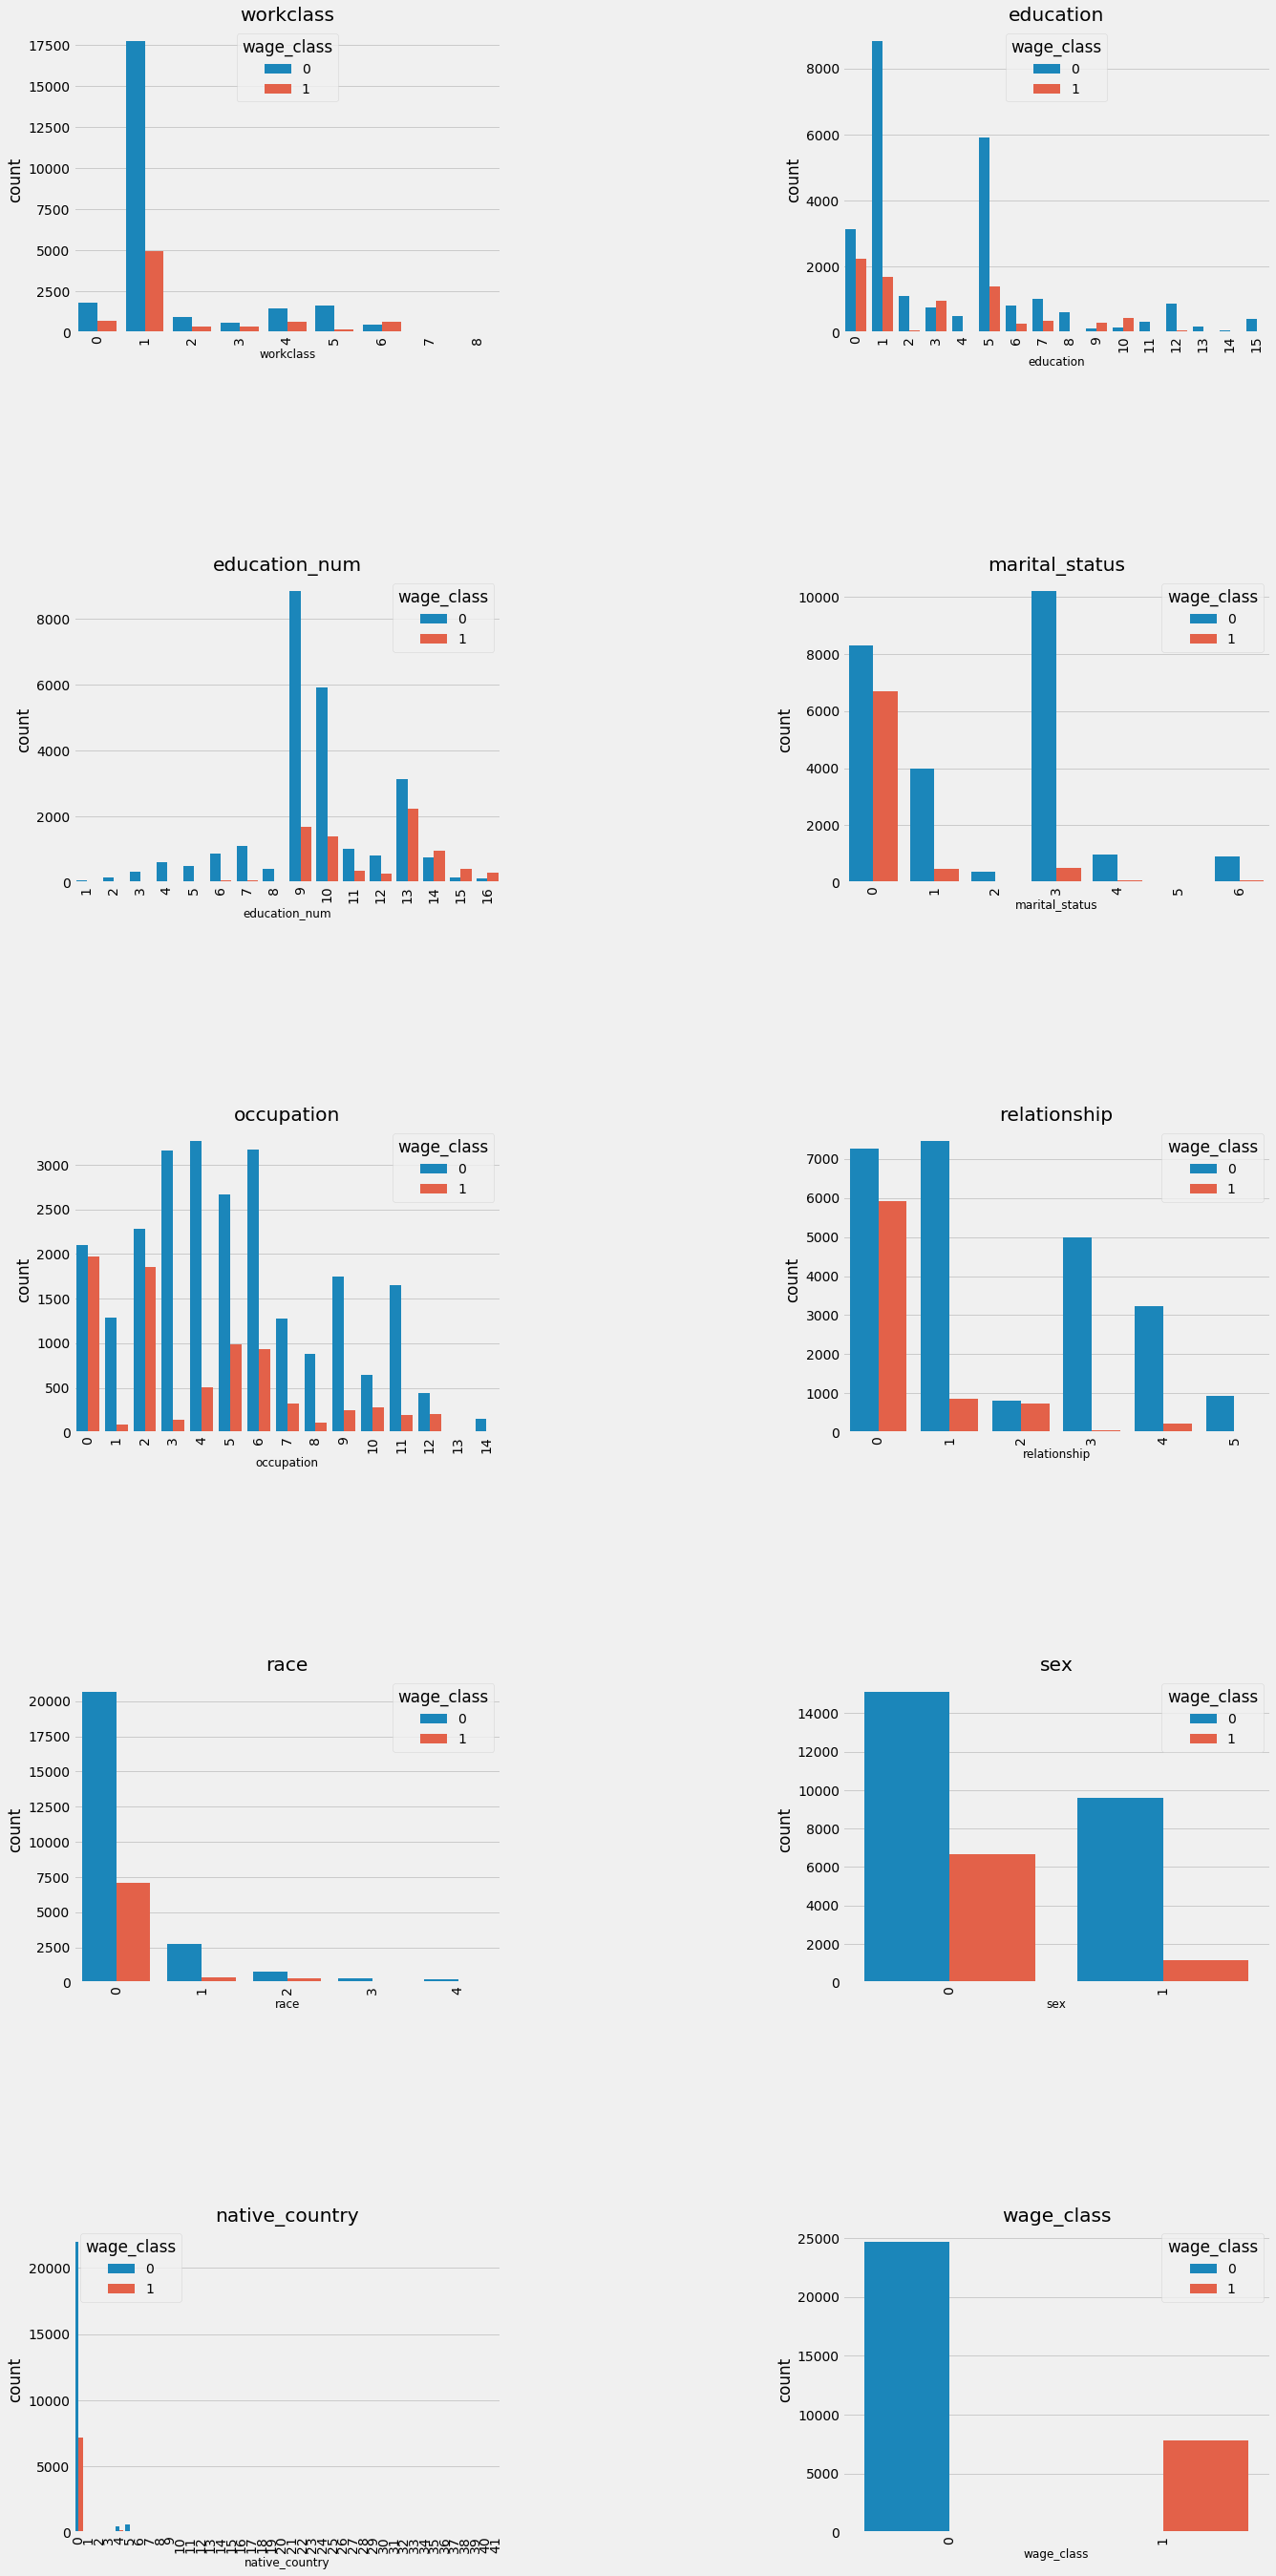

In [21]:
data_visualization_groupby_target(train_set,categorical_feature_list,cols=2, width=20, height=45, hspace=0.8, wspace=0.8)

# Distributions of continuous columns

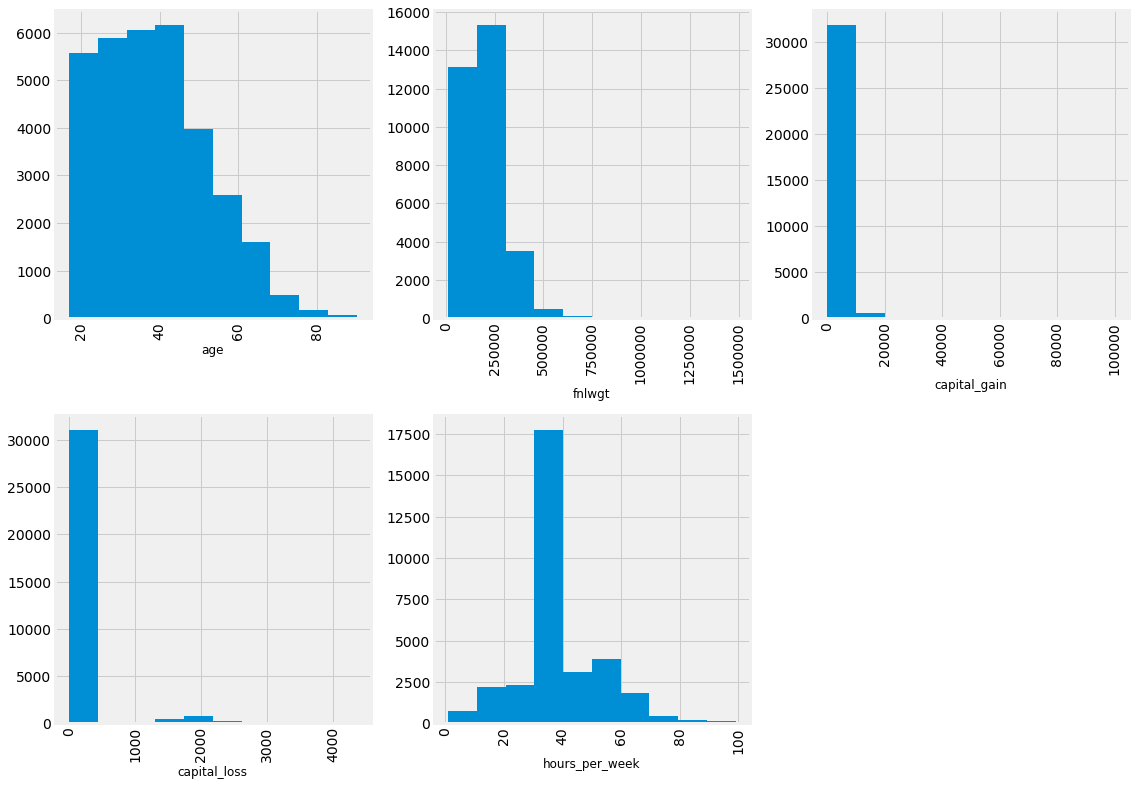

In [22]:
plt.figure(figsize=(16,16), facecolor='white')
plotnumber = 1

for column in train_set.columns:
    if plotnumber<=10 and column not in categorical_feature_list:
        ax = plt.subplot(3,3,plotnumber)
        plt.hist(train_set[column])
        plt.xlabel(column,fontsize=12)
        plt.xticks(rotation=90)
        plotnumber+=1
plt.tight_layout()

In [23]:
train_set.shape

(32560, 15)

# Over Sampling to Balance the Train dataset Using SMOTETOMEK

In [24]:
wage_class_zero = train_set[train_set['wage_class']==0]

wage_class_one = train_set[train_set['wage_class']==1]

In [25]:
print(f'wage_class_0: {wage_class_zero.shape}',f'wage_class_1: {wage_class_one.shape}')

wage_class_0: (24719, 15) wage_class_1: (7841, 15)


In [26]:
X = train_set.drop('wage_class', axis=1)
y = train_set['wage_class']

In [27]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [28]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_oversample,y_oversample=smk.fit_sample(X,y)

In [29]:
print(X_oversample.shape,y_oversample.shape)

(45080, 14) (45080,)


In [30]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_oversample)))

Original dataset shape Counter({0: 24719, 1: 7841})
Resampled dataset shape Counter({0: 22540, 1: 22540})


In [31]:
resampled_train_set = pd.concat([X_oversample,y_oversample], axis=1)

In [32]:
resampled_train_set.shape

(45080, 15)

In [33]:
resampled_train_set.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,0,83311,0,13,0,0,0,0,0,0,0,13,0,0
1,38,1,215646,1,9,1,1,1,0,0,0,0,40,0,0
2,53,1,234721,2,7,0,1,0,1,0,0,0,40,0,0


# Visualization for Over sampled dataset

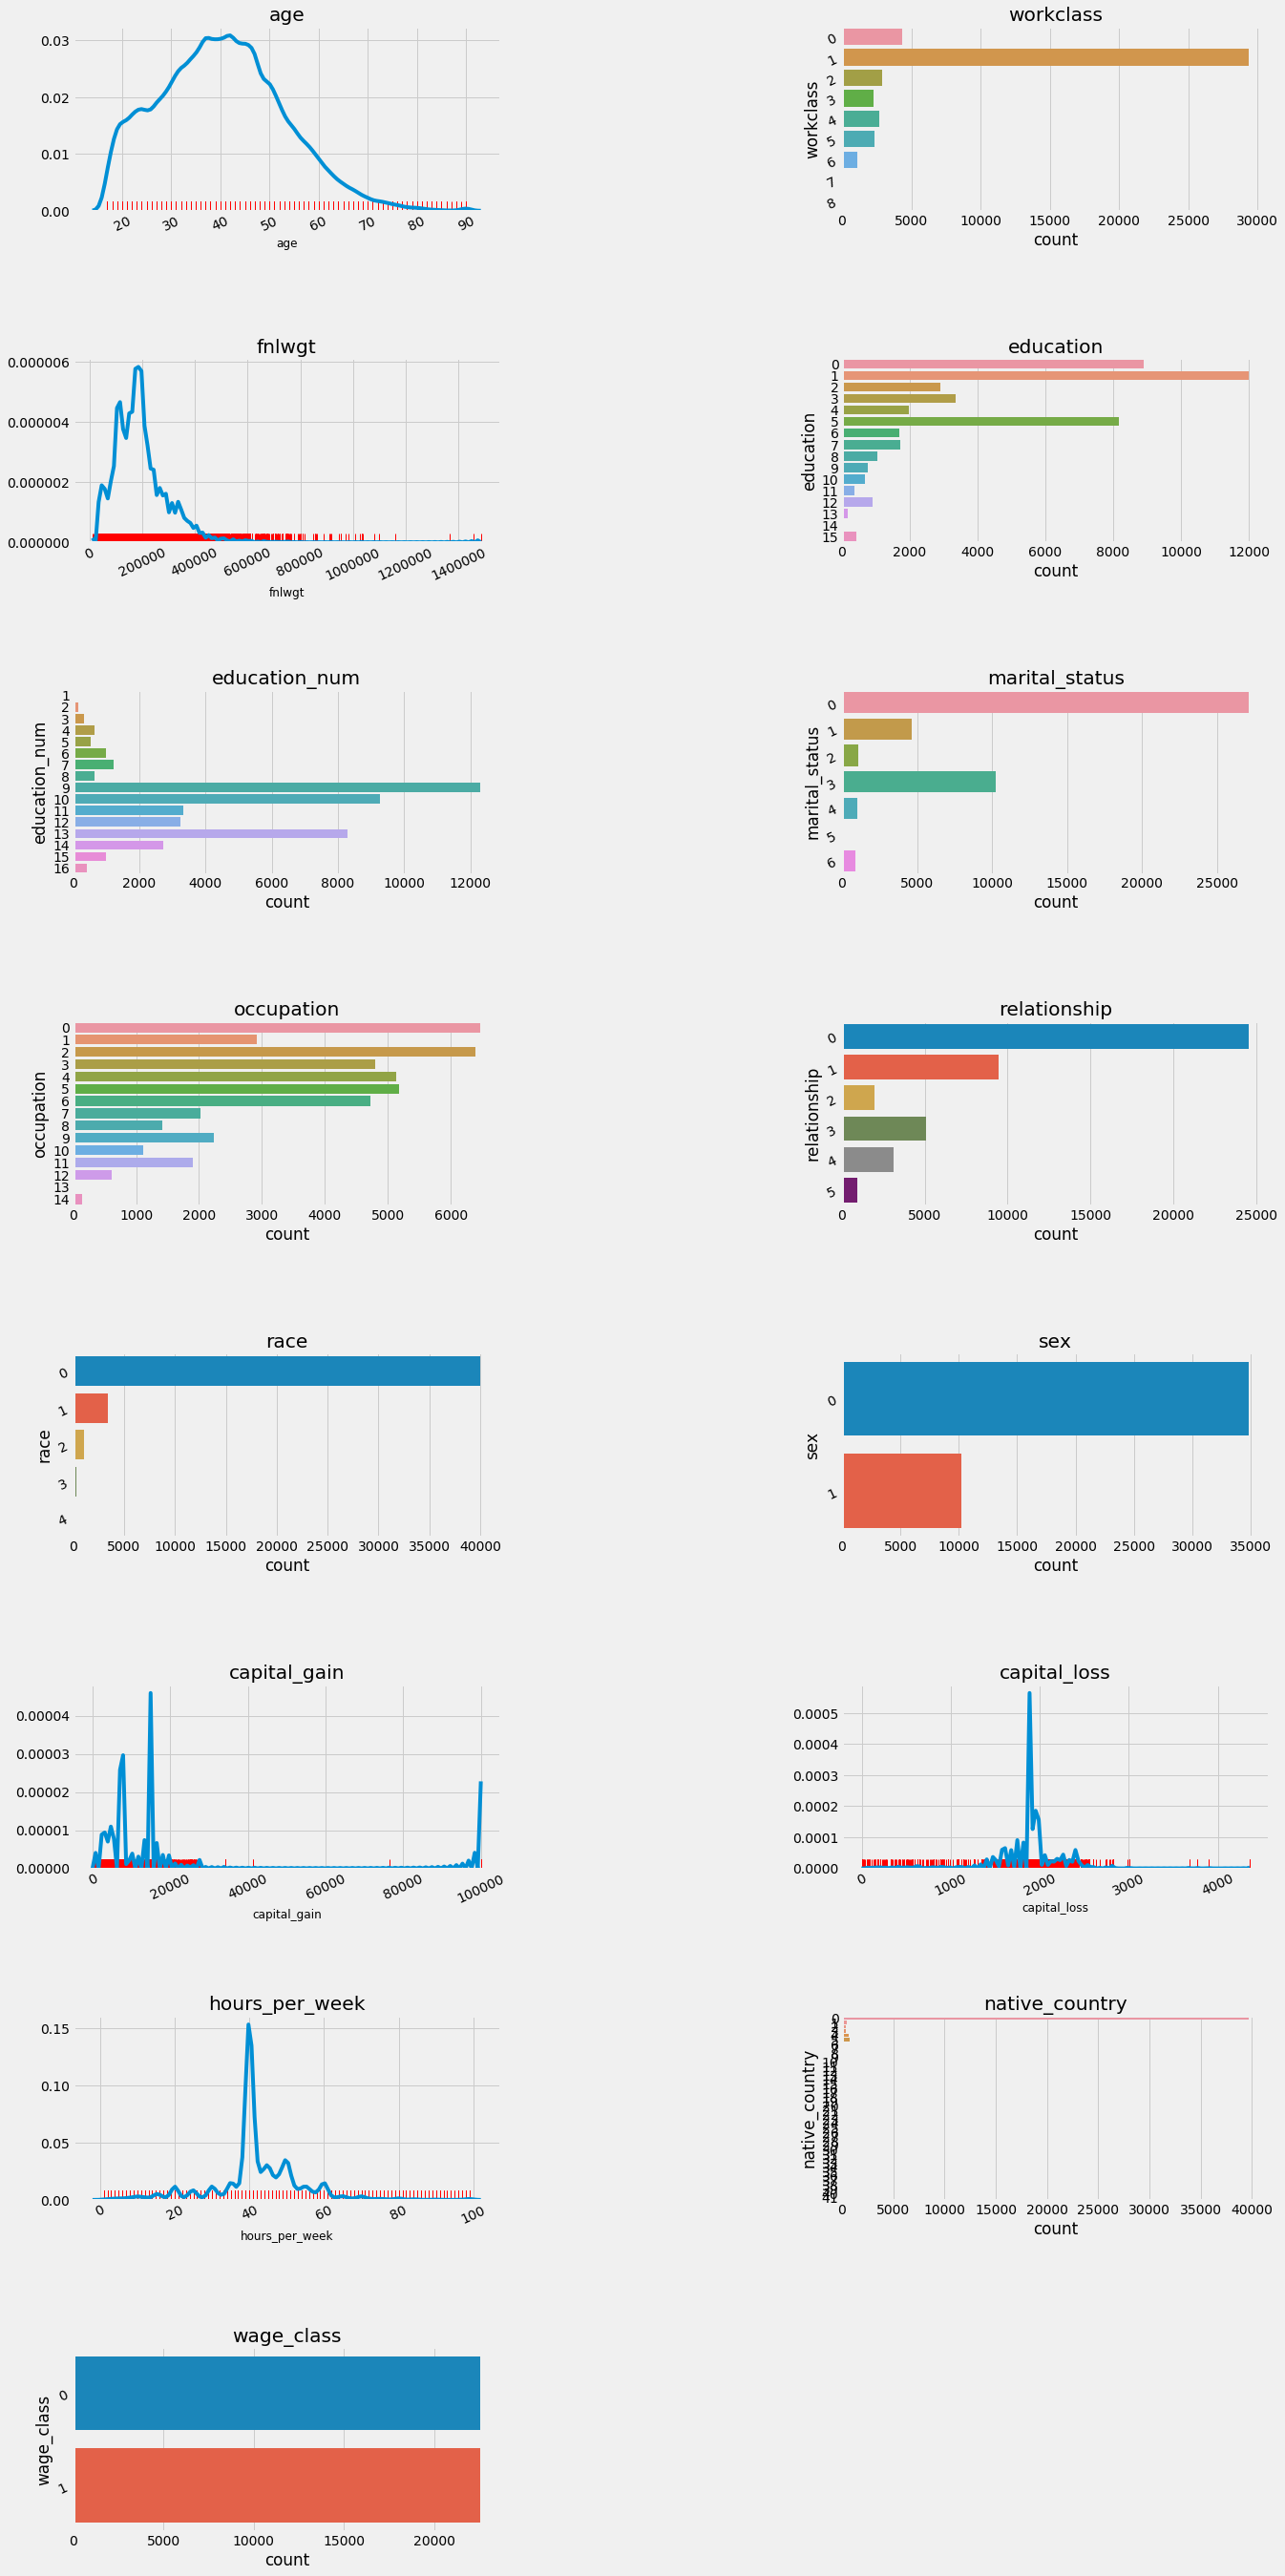

In [34]:
data_visualization(resampled_train_set,categorical_feature_list,cols=2, width=20, height=45, hspace=0.8, wspace=0.8)

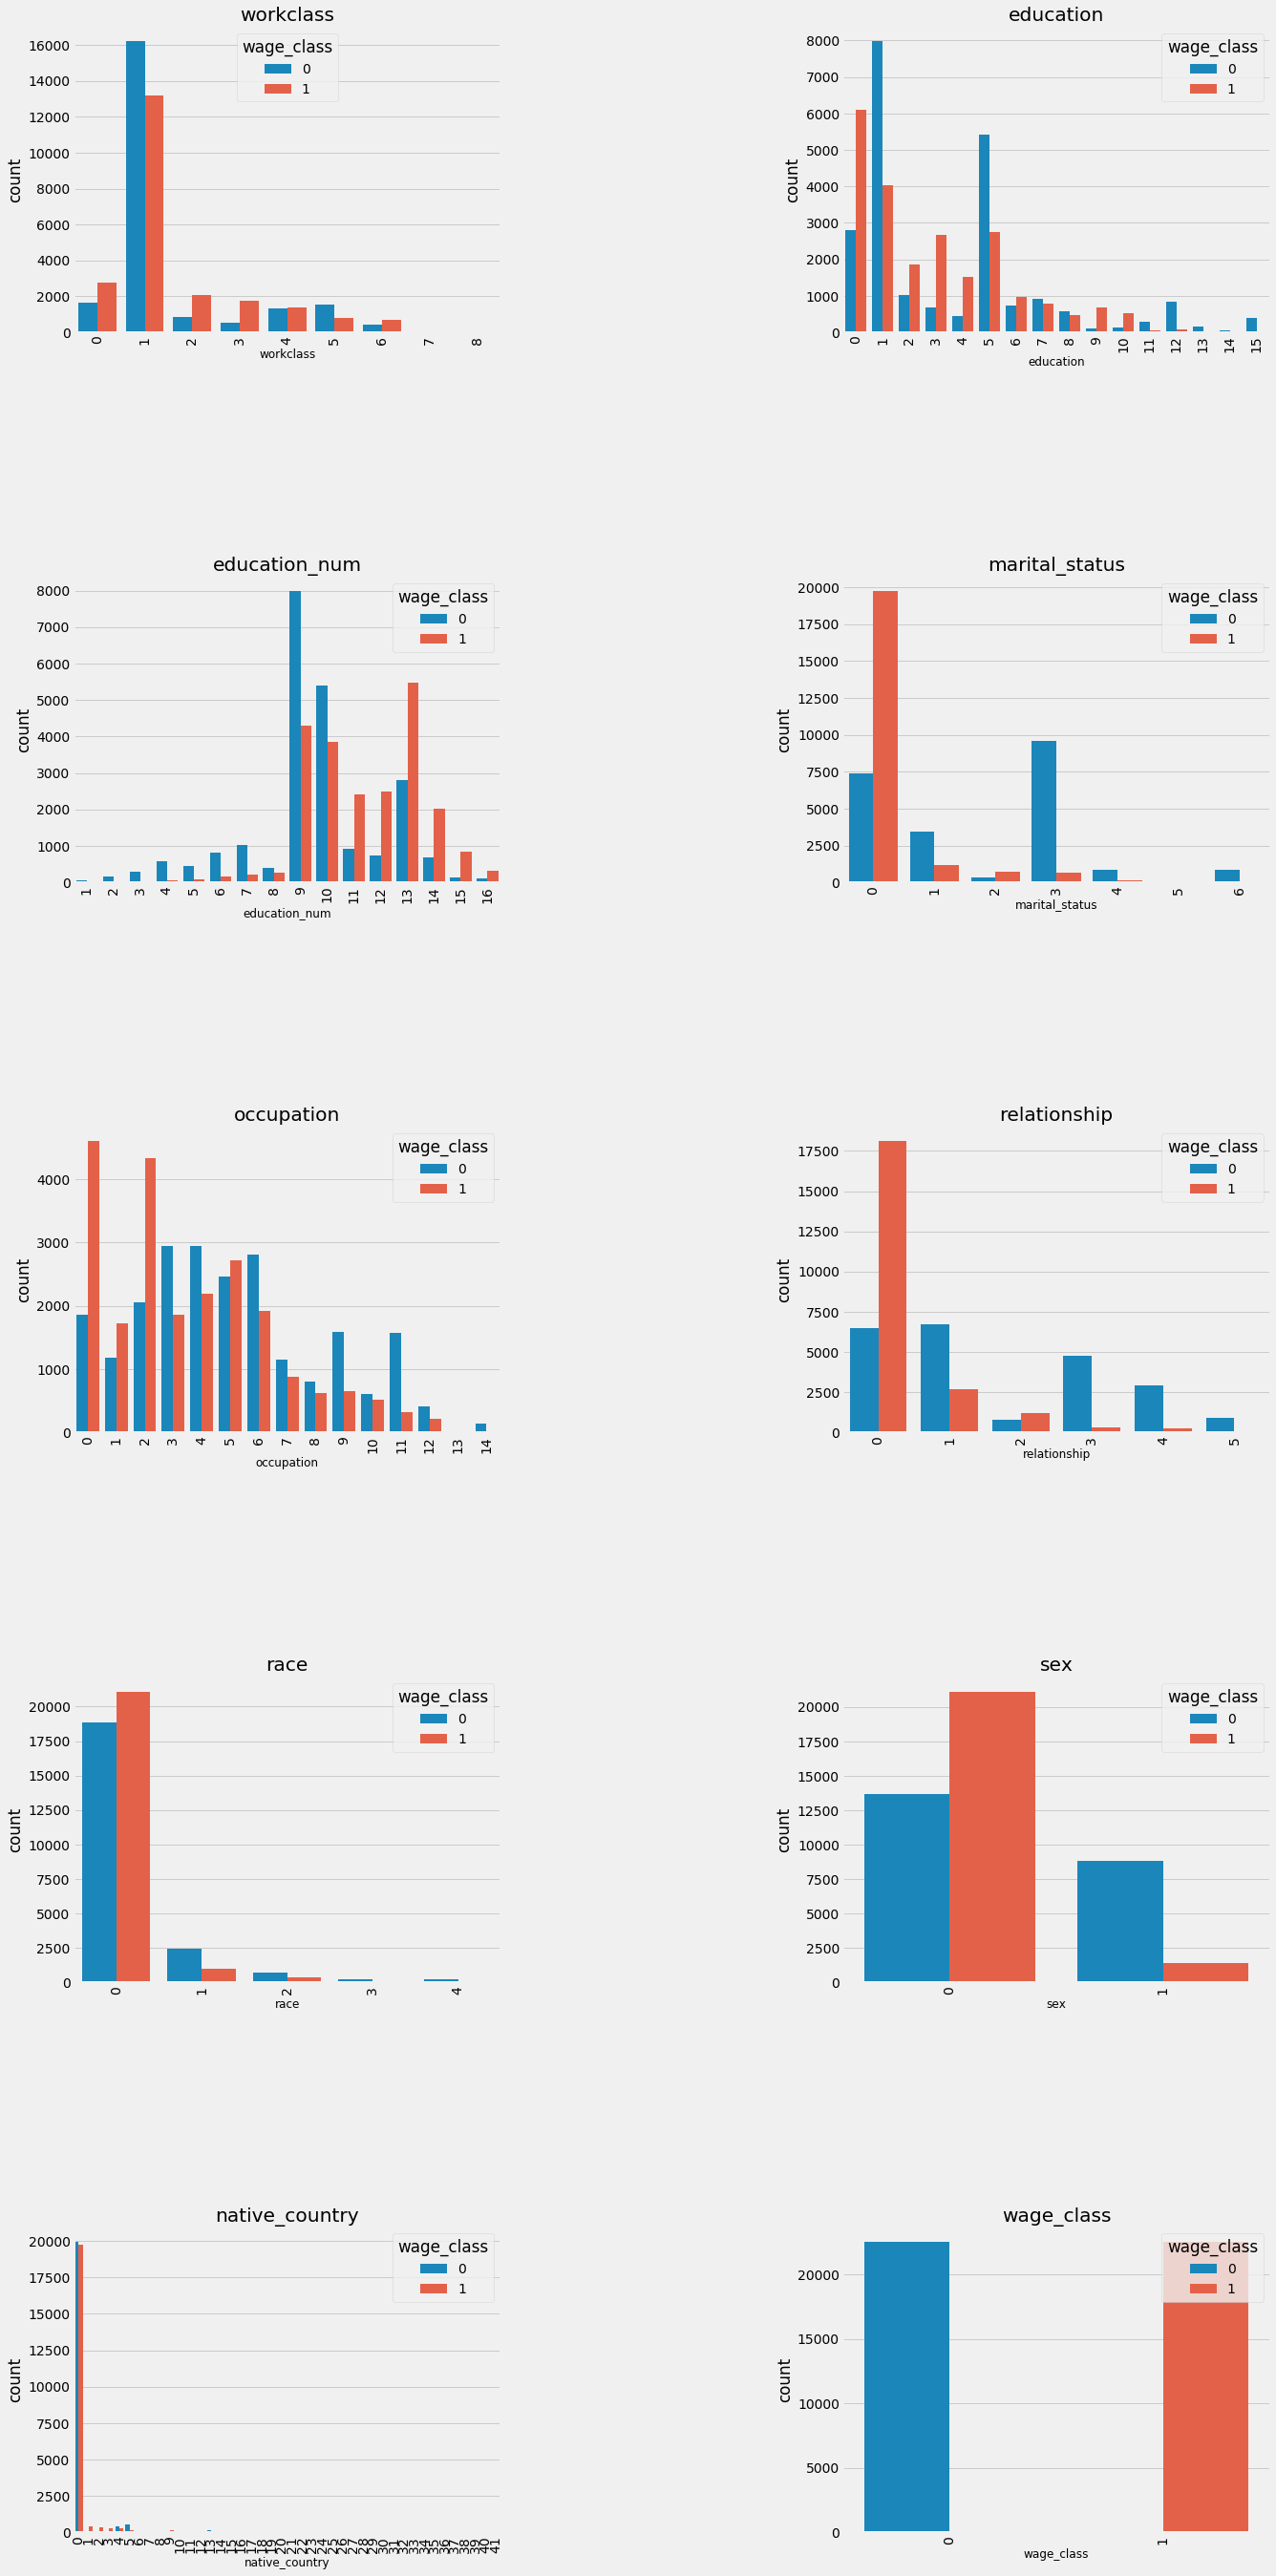

In [35]:
data_visualization_groupby_target(resampled_train_set,categorical_feature_list,cols=2, width=20, height=45, hspace=0.8, wspace=0.8)

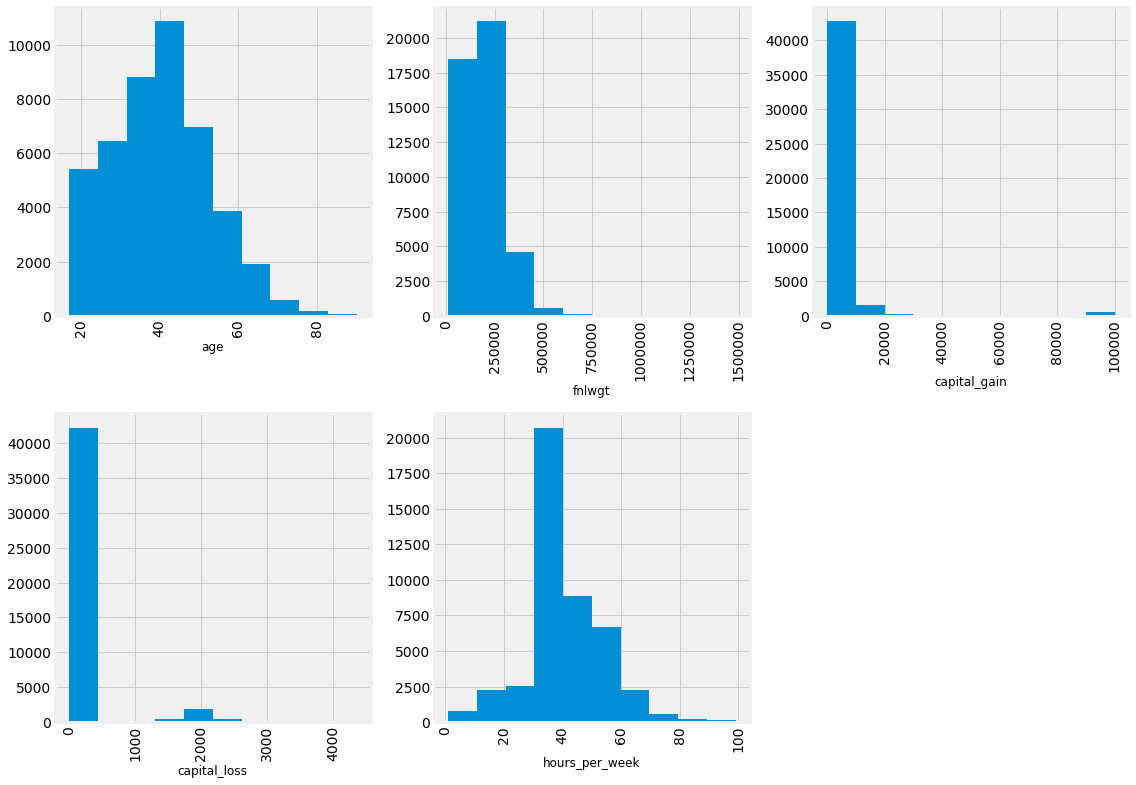

In [36]:
plt.figure(figsize=(16,16), facecolor='white')
plotnumber = 1

for column in train_set.columns:
    if plotnumber<=10 and column not in categorical_feature_list:
        ax = plt.subplot(3,3,plotnumber)
        plt.hist(resampled_train_set[column])
        plt.xlabel(column,fontsize=12)
        plt.xticks(rotation=90)
        plotnumber+=1
plt.tight_layout()

# Model Training

<b>Necessary imports and splitting data</b>

In [42]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_oversample,y_oversample, test_size = 0.3, random_state = 0)

<b>Timer function</b>

In [44]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# 1. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(random_state=0)

<b>Using RandomedsearchCV</b>

In [41]:
params= {
    "n_estimators" : [90,100,115,130],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
    'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
    'max_features' : ['auto','sqrt','log2']
}
random_search = RandomizedSearchCV(estimator=rand_clf,param_distributions=params,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [297]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.1s finished



 Time taken: 0 hours 0 minutes and 12.86 seconds.


In [298]:
random_search.best_estimator_

RandomForestClassifier(max_depth=23, max_features='sqrt', min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, n_estimators=115,
                       random_state=0)

In [299]:
RF_final = RandomForestClassifier(max_depth=23, max_features='sqrt', min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, n_estimators=115,
                       random_state=0)

In [317]:
cross_val_score(RF_final, X_train,y_train, cv=10, scoring='roc_auc').mean()

0.8856648425598236

In [318]:
cross_val_score(RF_final, X_train,y_train, cv=10, scoring='accuracy').mean()

0.7848275716618561

# 2. XGBOOST

In [306]:
import xgboost as xgb
from xgboost import XGBClassifier

In [307]:
## Hyper Parameter Optimization
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [312]:
xgb_class=XGBClassifier()
random_search_2=RandomizedSearchCV(xgb_class,param_distributions=params,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [313]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_2.fit(X_train,y_train)
timer(start_time)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   59.0s finished



 Time taken: 0 hours 1 minutes and 2.24 seconds.


In [314]:
random_search_2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [316]:
xgb_final = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [319]:
cross_val_score(xgb_final, X_train,y_train, cv=10, scoring='accuracy').mean()

0.906356970547886

In [320]:
cross_val_score(xgb_final, X_train,y_train, cv=10, scoring='roc_auc').mean()

0.9729103646112728

# 3. Logistic Regression

In [325]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression

In [326]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_oversample)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_oversample.columns)

In [327]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled_df,y_oversample, test_size = 0.3, random_state = 0)

In [328]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [329]:
cross_val_score(log_reg, X_train_scaled, y_train, cv=10, scoring='roc_auc').mean()

0.9105730089459808

In [330]:
cross_val_score(log_reg, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

0.8348339690554955

# 4. KNN

<b>we will use the scaler transformed data in KNN </b>

In [332]:
from sklearn.neighbors import KNeighborsClassifier

In [333]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [334]:
params = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }
random_search_3 = RandomizedSearchCV(estimator=knn,param_distributions=params,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [335]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_3.fit(X_train_scaled,y_train)
timer(start_time)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished



 Time taken: 0 hours 2 minutes and 56.3 seconds.


In [336]:
random_search_3.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=34, n_neighbors=13)

In [337]:
Knn_final = KNeighborsClassifier(algorithm='ball_tree', leaf_size=34, n_neighbors=13)

In [338]:
cross_val_score(Knn_final, X_train_scaled, y_train, cv=10, scoring='roc_auc').mean()

0.9276436364475289

In [339]:
cross_val_score(Knn_final, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

0.8516927282624197

# Choosing the Best Model

In [353]:
def model_performance_comparision(models,X_train, X_test,X_train_scaled,X_test_scaled, y_train,y_test):
    Model_name = []
    Accuracy = []
    Precision = []
    Recall = []
    Specificity = []
    F1_Score = []
    AUC = []
    for i in models:
        Model_name.append(i)
        if i == 'log_reg' or i == 'Knn_final':
            models[i].fit(X_train_scaled,y_train)
            y_pred = models[i].predict(X_test_scaled)
        else:
            models[i].fit(X_train,y_train)
            y_pred = models[i].predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        Accuracy.append(accuracy)
        
        conf_mat = confusion_matrix(y_test,y_pred)
        true_positive = conf_mat[0][0]
        false_positive = conf_mat[0][1]
        false_negative = conf_mat[1][0]
        true_negative = conf_mat[1][1]
        
        precision = true_positive/(true_positive+false_positive)
        Precision.append(precision)
        
        recall = true_positive/(true_positive+false_negative)
        Recall.append(recall)

        specificity = true_negative/(true_negative + false_positive)
        Specificity.append(specificity)

        f1_Score = 2*(recall * precision) / (recall + precision)
        F1_Score.append(f1_Score)
        
        auc = roc_auc_score(y_test, y_pred)
        AUC.append(auc)
        
    performance_df = pd.DataFrame({'Model Name':Model_name,'Accuracy':Accuracy,'Precision':Precision, 'Recall':Recall, 'Specificity':Specificity, 'F1_Score':F1_Score, 'AUC': AUC})
    return performance_df        

In [354]:
models = {'Logistic_Regression':log_reg,'K-Neighbors':Knn_final,'Random_Forest':RF_final,'XGBoost':xgb_final}
model_performance_comparision(models,X_train, X_test,X_train_scaled,X_test_scaled, y_train,y_test)

C:\Users\ayonh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model Name,Accuracy,Precision,Recall,Specificity,F1_Score,AUC
0,Logistic_Regression,0.759613,0.742688,0.769160,0.750680,0.755692,0.759633
1,K-Neighbors,0.705856,0.678582,0.718261,0.694725,0.697858,0.705889
2,Random_Forest,0.781056,0.707681,0.829898,0.744678,0.763932,0.781143
3,XGBoost,0.904836,0.904431,0.905367,0.904304,0.904899,0.904836


# Conclusion: The best model is XGBoost. So we will save this in pickle

In [356]:
import pickle
filename = 'xgboost_model.pickle'
pickle.dump(xgb_final, open(filename, 'wb'))

# Working with Test File

In [16]:
test_set = pd.read_csv('adult.test',names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class'], header = 0, na_values="?")
test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [17]:
test_set.shape

(16281, 15)

<b>Dividing the test set in mutiple smaller test sets</b>

In [18]:
test_set1 = test_set.iloc[:5000,].reset_index(drop=True)
test_set2 = test_set.iloc[5001:10000,].reset_index(drop=True)
test_set3 = test_set.iloc[10001:15000,].reset_index(drop=True)
test_set4 = test_set.iloc[15001:,].reset_index(drop=True)

In [19]:
test_set4.shape

(1280, 15)

In [20]:
test_set1.to_csv('test_set1.csv')
test_set2.to_csv('test_set2.csv')
test_set3.to_csv('test_set3.csv')
test_set4.to_csv('test_set4.csv')

In [21]:
test_set1.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


<b>Testing on a test set with all the functions</b>

In [22]:
categorical_feature_list = categorical_feature(test_set1, 20)
categorical_feature_list

['workclass',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class']

In [23]:
for col in categorical_feature_list:
    print(f'{col}:{test_set1[col].unique()}: {test_set1[col].dtypes}')

workclass:[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay']: object
education:[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']: object
education_num:[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]: int64
marital_status:[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']: object
occupation:[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']: object
relationship:[' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative']: object
race:[' Black' ' White' ' Asian-Pac-Islander' ' Other' ' Amer-Indian-

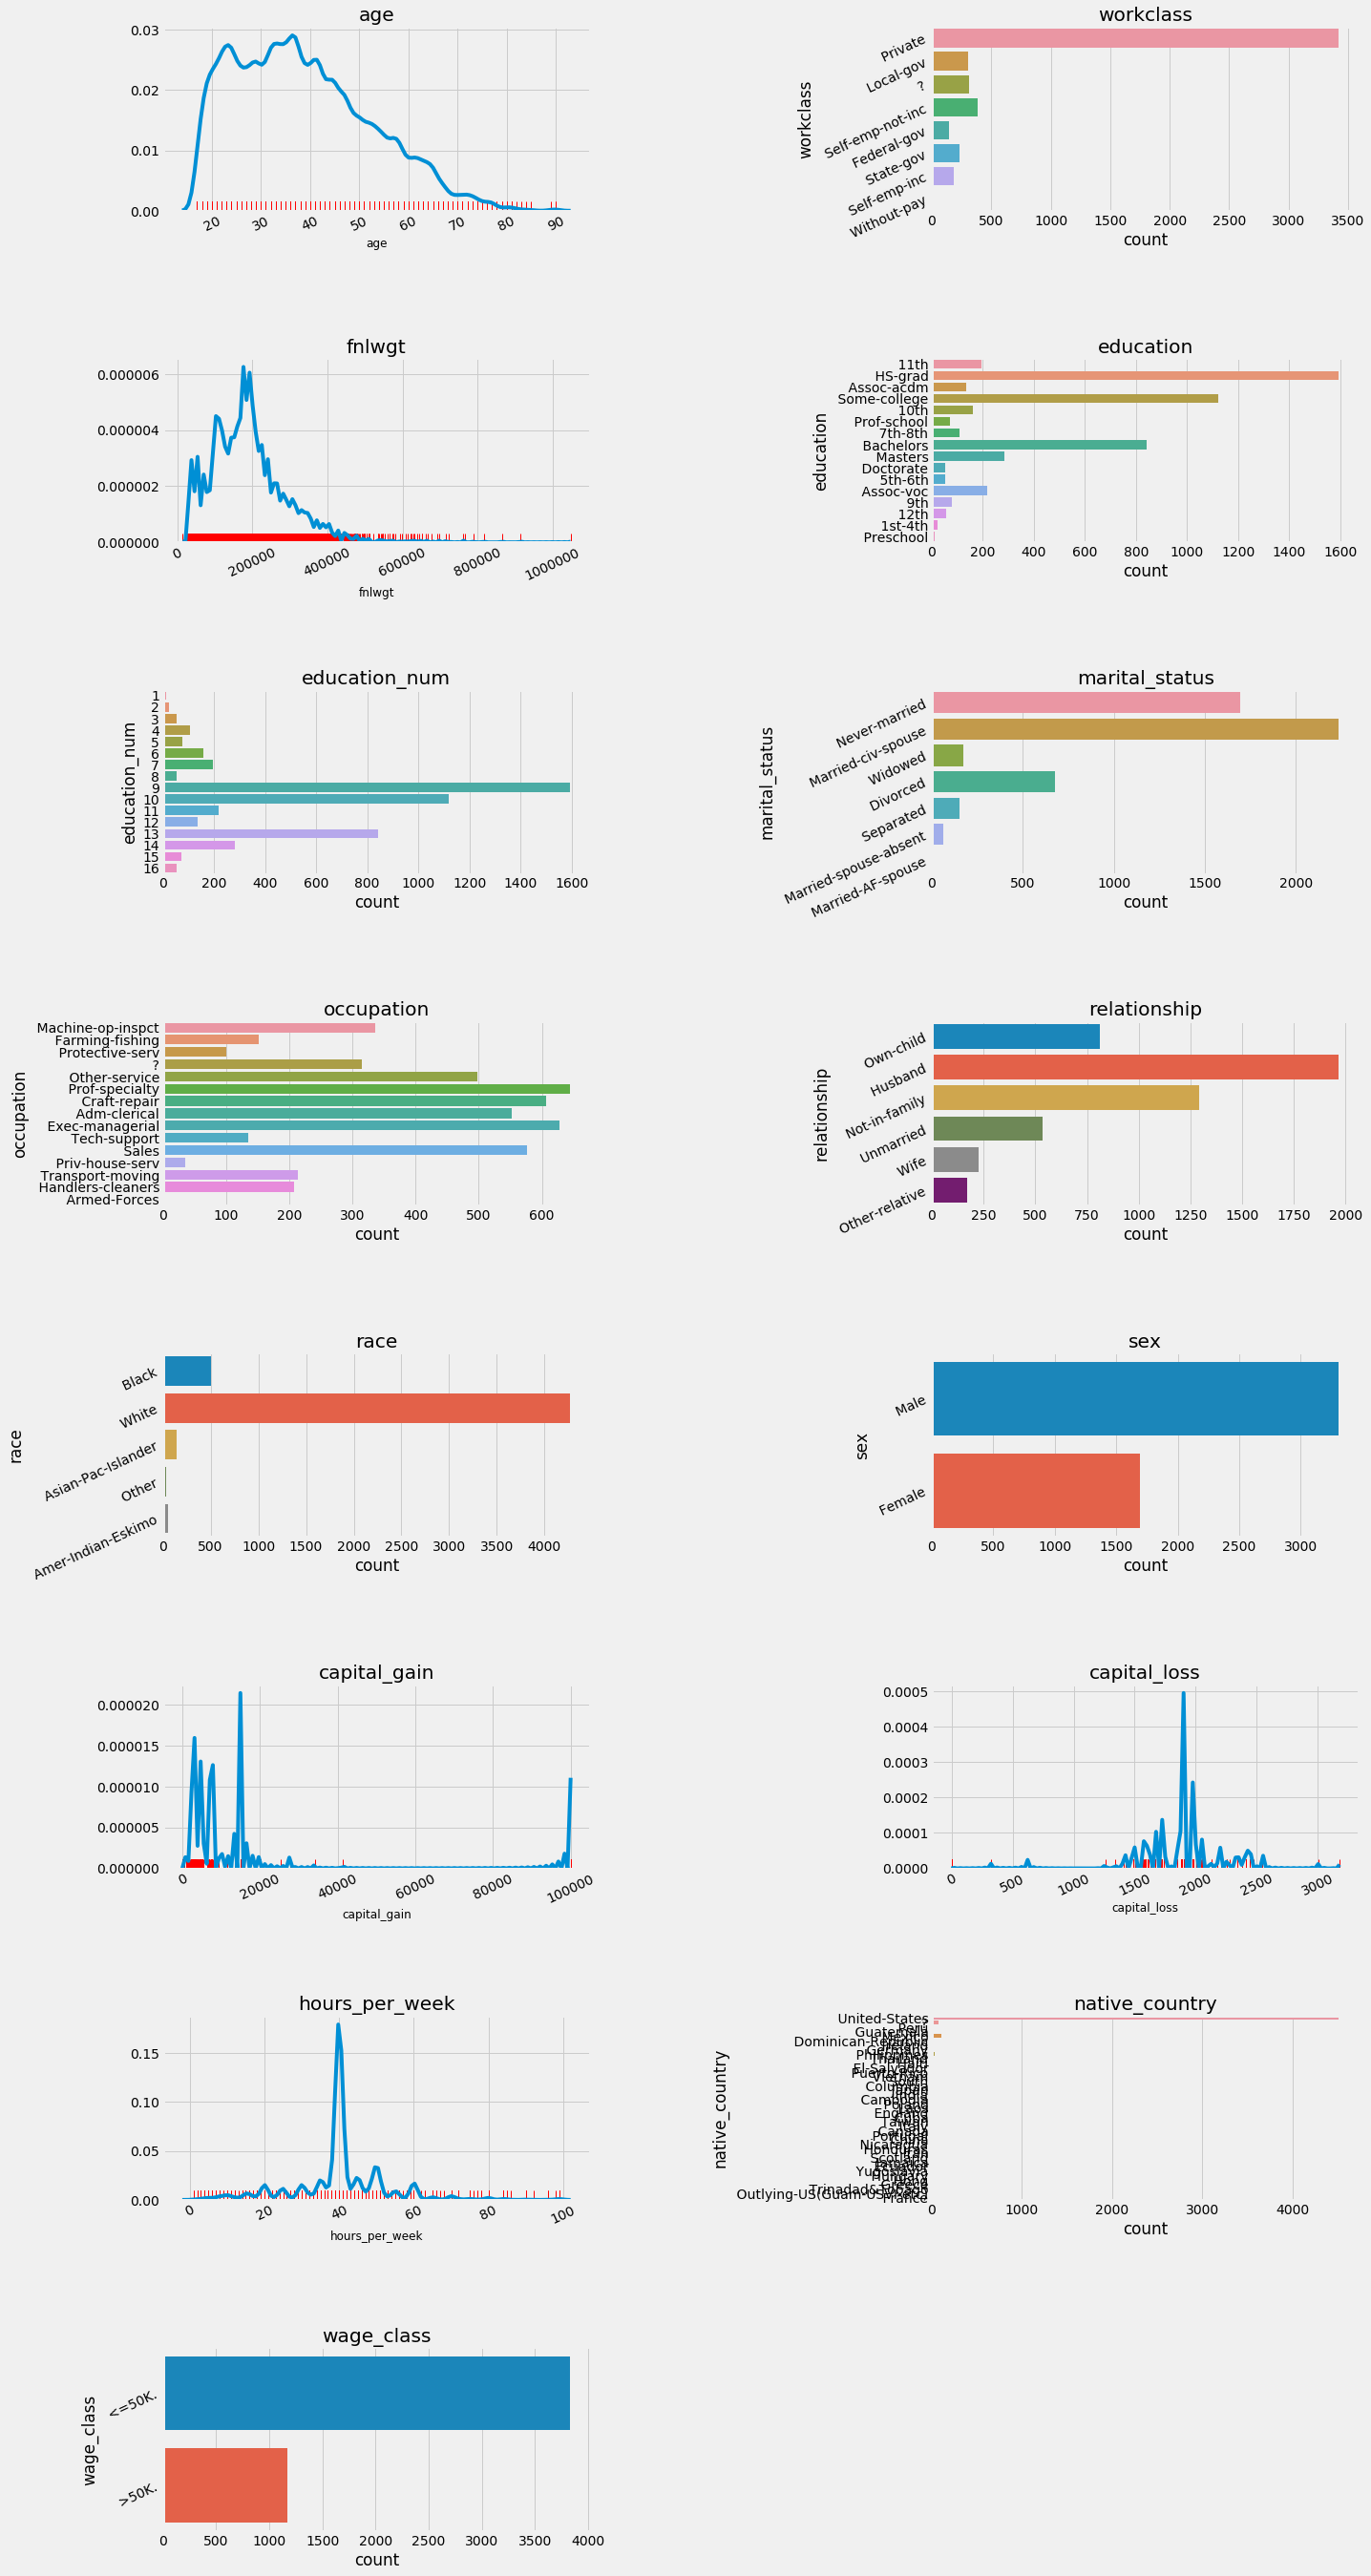

In [383]:
data_visualization(test_set1,categorical_feature_list,cols=2, width=20, height=45, hspace=0.8, wspace=0.8)

In [384]:
test_set1 = encoder(test_set1)

In [385]:
for col in categorical_feature_list:
    print(f'{col}:{test_set1[col].unique()}: {test_set1[col].dtypes}')

workclass:[0 1 2 3 4 5 6 7]: int64
education:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]: int64
education_num:[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]: int64
marital_status:[0 1 2 3 4 5 6]: int64
occupation:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]: int64
relationship:[0 1 2 3 4 5]: int64
race:[0 1 2 3 4]: int64
sex:[0 1]: int64
native_country:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]: int64
wage_class:[0 1]: int64


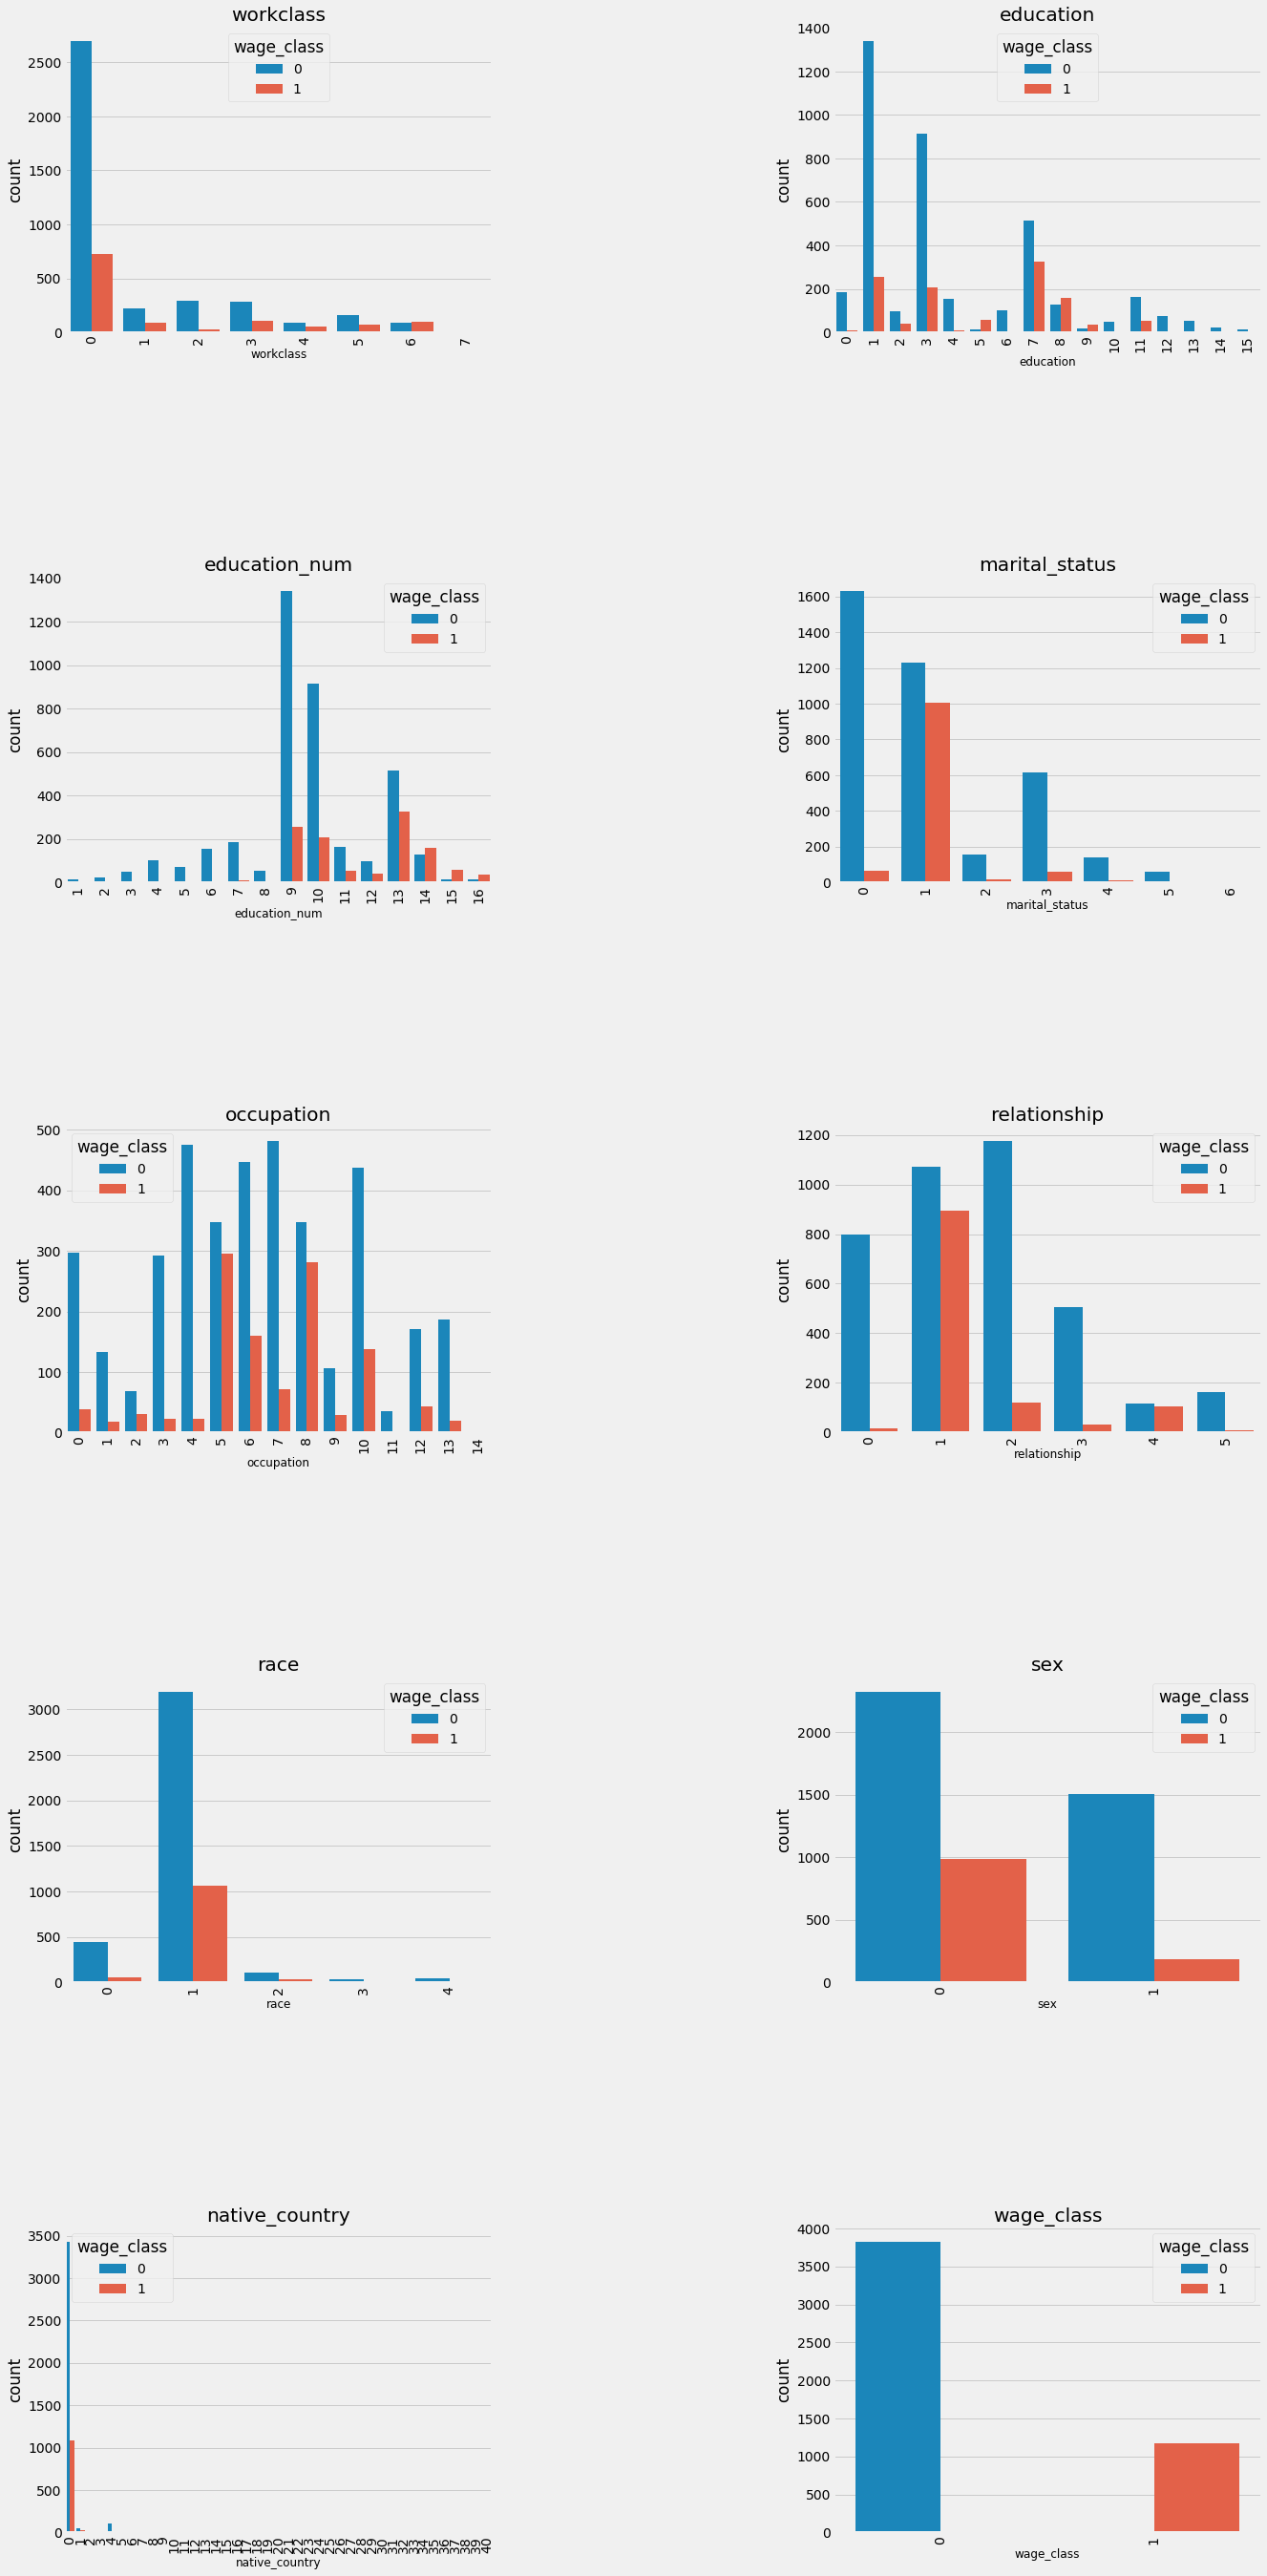

In [386]:
data_visualization_groupby_target(test_set1,categorical_feature_list,cols=2, width=20, height=45, hspace=0.8, wspace=0.8)

In [388]:
X_test_set1 = test_set1.drop('wage_class', axis=1)
y_test_set1 = test_set1['wage_class']

In [389]:
loaded_model = pickle.load(open(filename, 'rb'))
pred=loaded_model.predict(X_test_set1)
accuracy = accuracy_score(y_test_set1,pred)
print(f'accuracy: {accuracy}')

accuracy: 0.6514


# Write a class for data preprocessing for test batches

In [24]:
def categorical_feature(dataframe, threshold_value):
    categorical_features = []
    for col in dataframe.columns:
            if len(dataframe[col].unique())<=threshold_value or dataframe[col].dtypes == 'object':
                    #print(f'{col}:{dataframe[col].unique()}: {dataframe[col].dtypes}')
                    categorical_features.append(col)
            else:
                    continue             
    return categorical_features 

In [25]:
categorical_feature_list = categorical_feature(train_set, 20)
categorical_feature_list

['workclass',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class']

In [35]:
class batch_data_prep:
    def __init__(self,dataframe, threshold):
        self.dataframe = dataframe
        self.threshold = threshold
        
    def categorical_feature(self, dataframe, threshold):
        categorical_features = []
        for col in dataframe.columns:
            if len(dataframe[col].unique())<=threshold or dataframe[col].dtypes == 'object':
                    #print(f'{col}:{dataframe[col].unique()}: {dataframe[col].dtypes}')
                    categorical_features.append(col)
            else:
                    continue             
        return categorical_features     
    
    
    def data_visualization(self, dataframe,categorical_feature_list,cols=2, width=20, height=45, hspace=0.8, wspace=0.8):
        #Use matplotlib style settings from a style specification.
        plt.style.use('fivethirtyeight')   
        #Create a new figure
        fig = plt.figure(figsize=(width,height)) 
        # customizing the subplots
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
        rows = math.ceil(float(dataframe.shape[1]) / cols)
        # iterating over the columns and then showing the data distribution in various columns
    
        for i, column in enumerate(dataframe.columns):
        
            ax = fig.add_subplot(rows, cols, i + 1)
            ax.set_title(column)
            if column not in categorical_feature_list:
                # with out using the following parameters:
                #hist = False, rug = True, rug_kws = {'color' : 'r'}, kde_kws = {'bw' : 1}
                #we will run into error: RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density
                #refer link: https://stackoverflow.com/questions/60596102/seaborn-selected-kde-bandwidth-is-0-cannot-estimate-density
                g = sns.distplot(dataframe[column],hist = False, rug = True, rug_kws = {'color' : 'r'}, kde_kws = {'bw' : 1})
            
                plt.xlabel(column,fontsize=12)
                plt.xticks(rotation=25)
            else:
                g = sns.countplot(y=column, data=dataframe)
                if column == 'education' or column == 'occupation' or column == 'education_num' or column == 'native_country':
                    plt.yticks(rotation=0)
                else:        
                    plt.yticks(rotation=25)
        fig.savefig('full_figure_1.jpg')
           
                    
    def encoder(self,dataframe):
        df = dataframe.copy()
        for column in df.columns:
            if df[column].dtypes == 'object':
                length_of_unique_value_set = list(range(df[column].nunique()))
                value_set = list(df[column].unique())
                temp_mapping_dict = dict(zip(value_set,length_of_unique_value_set))
                df[column] = df[column].map(temp_mapping_dict)
        return df                  
                    
    def data_visualization_groupby_target(self,dataframe,categorical_feature_list,cols=5, width=20, height=30, hspace=0.2, wspace=0.5):
        #Use matplotlib style settings from a style specification.
        plt.style.use('fivethirtyeight')     
        #Create a new figure
        fig = plt.figure(figsize=(width,height)) 
        # customizing the subplots
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
        rows = math.ceil(float(len(categorical_feature_list)) / cols)
        # iterating over the columns and then showing the data distribution in various columns
    
        for i, column in enumerate(categorical_feature_list):
        
            ax = fig.add_subplot(rows, cols, i + 1)
            ax.set_title(column)
            #temp_df = dataframe.groupby([column,'wage_class'])['wage_class'].count()
            g = sns.countplot(column,data=dataframe,hue='wage_class')
            plt.xlabel(column,fontsize=12)
            plt.xticks(rotation=90)
        fig.savefig('full_figure_2.jpg')     

In [28]:
testing = pd.read_csv('test_set4.csv')
testing_df = testing.drop('Unnamed: 0', axis=1)
testing_df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,54,Private,83103,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,67,United-States,<=50K.
1,31,Private,198103,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K.


In [29]:
a = data_prep(testing_df, 20)
categorical_feature_list = a.categorical_feature(testing_df, 20)
#a.extract_post_information()
#Price,Date,Title = a.extract_post_information()


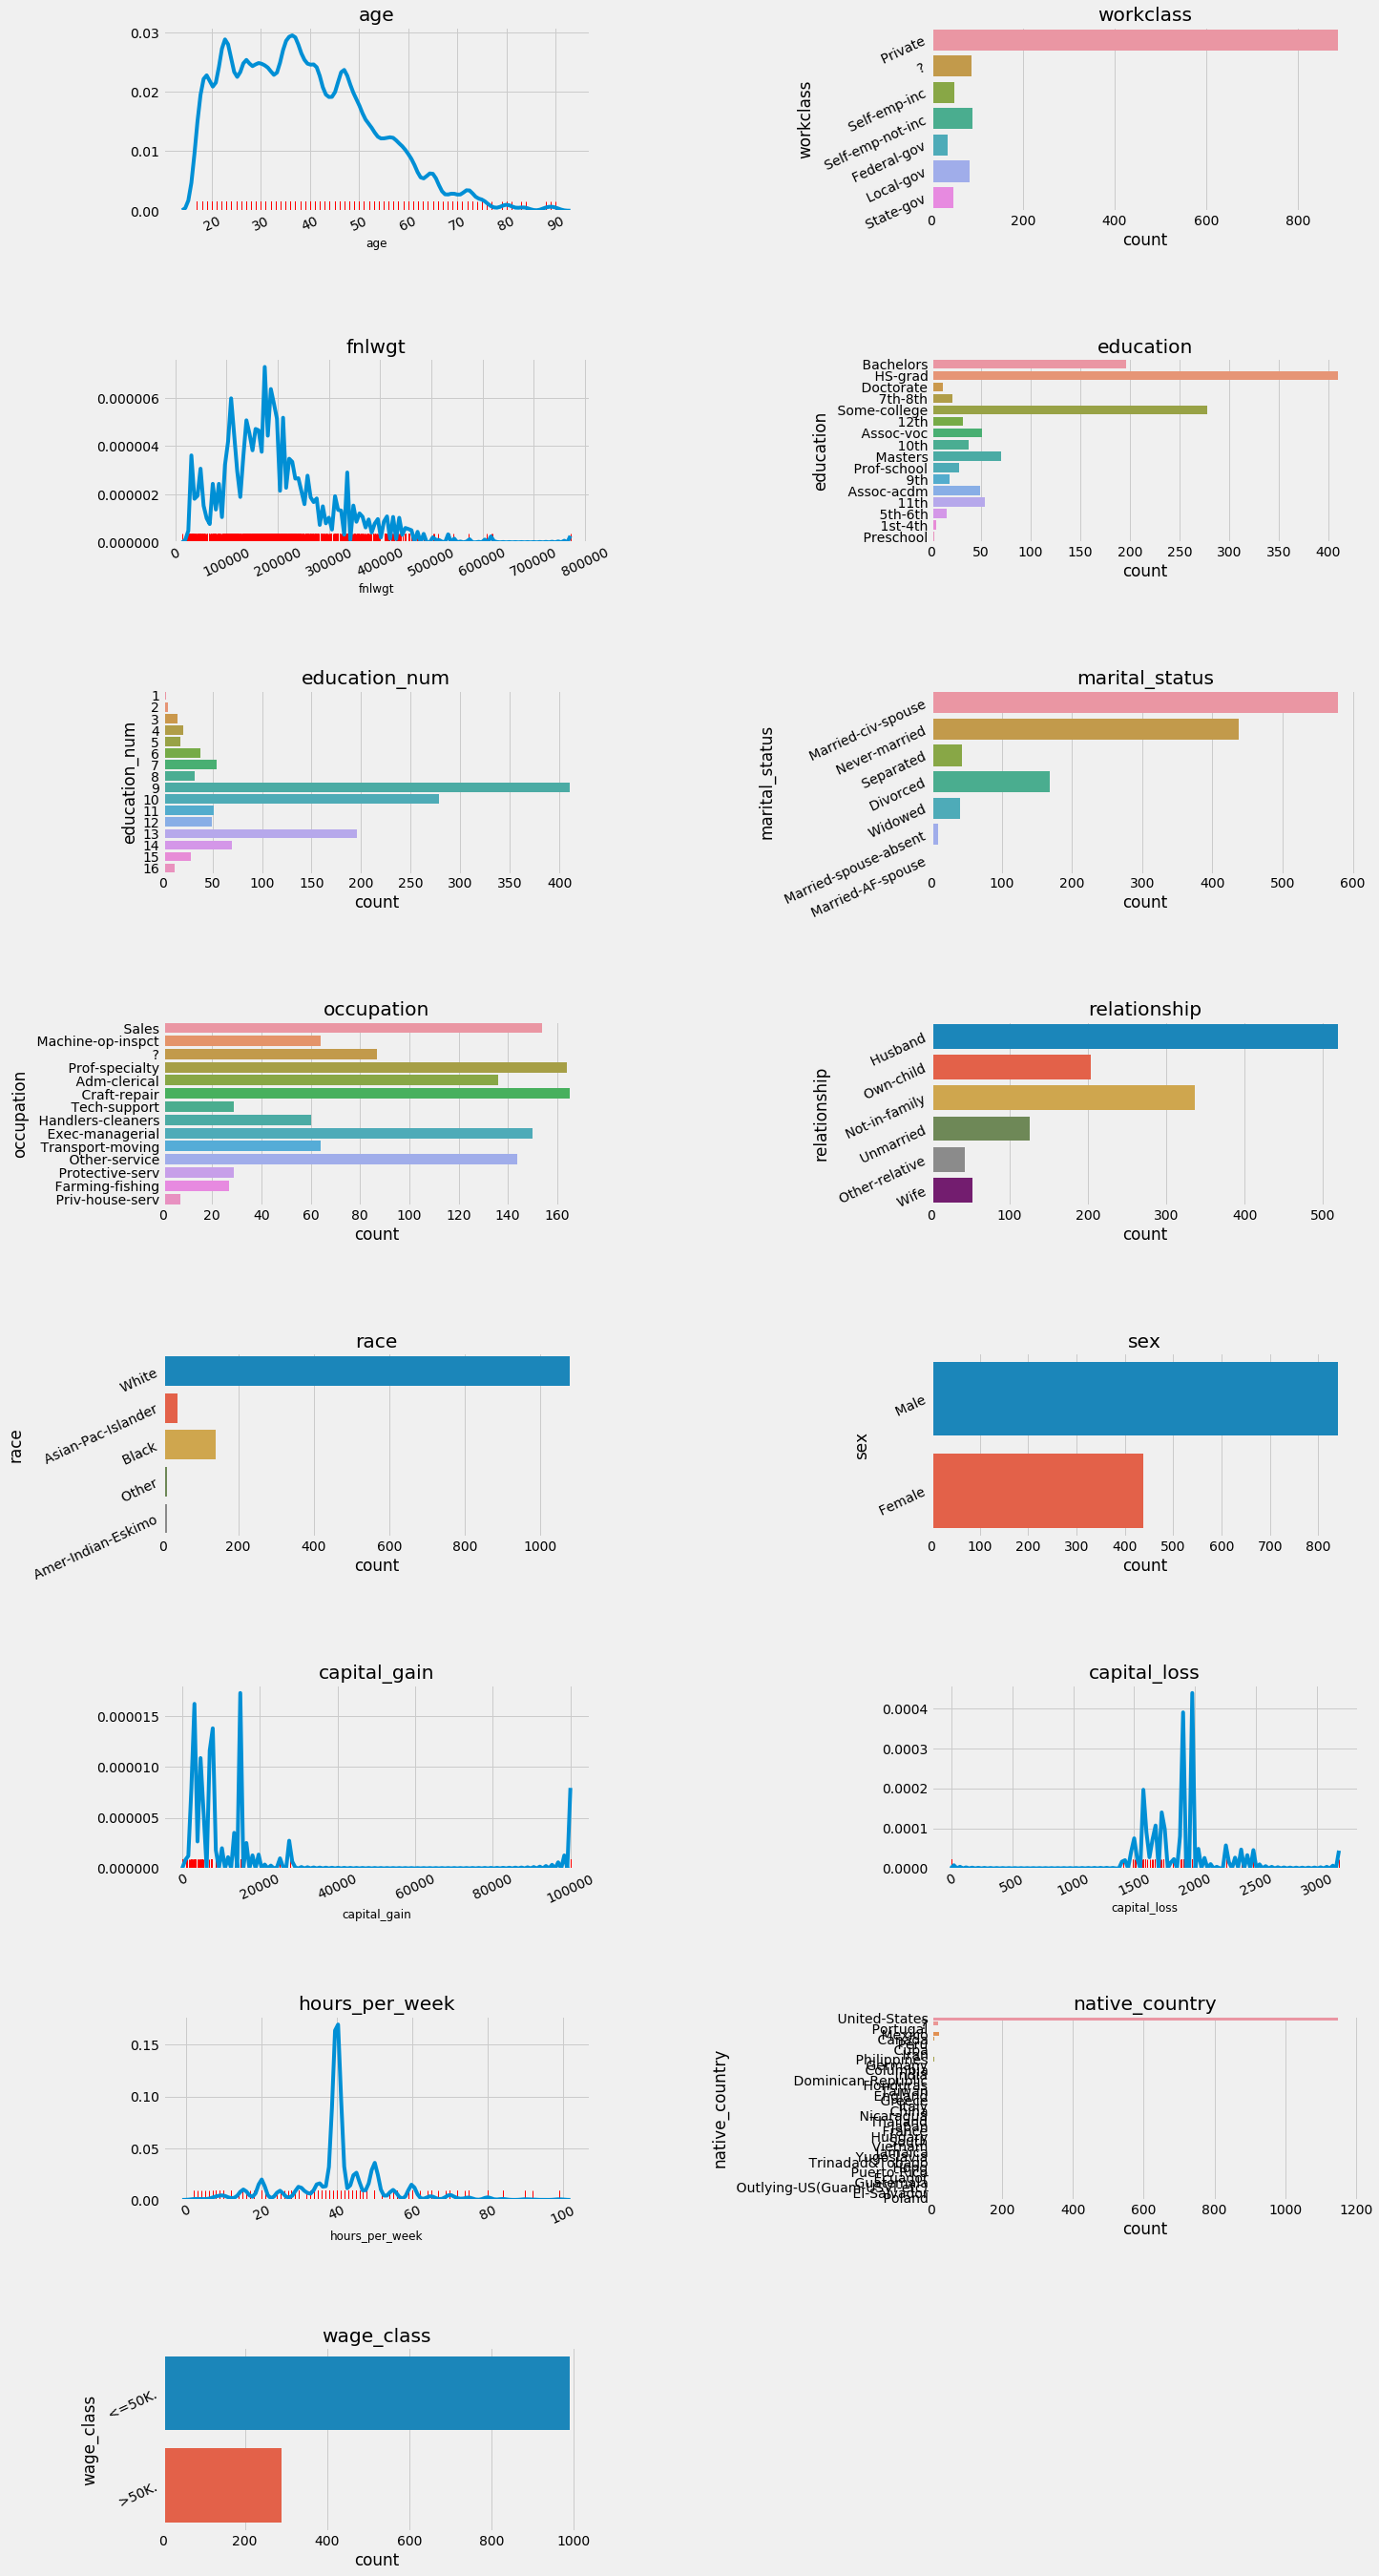

In [53]:
#data_visualization(self, dataframe,categorical_feature_list,cols=5, width=20, height=30, hspace=0.2, wspace=0.5)
a.data_visualization(testing,categorical_feature_list,cols=2, width=20, height=45, hspace=0.8, wspace=0.8)

In [30]:
encoded_df = a.encoder(testing_df)
encoded_df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,54,0,83103,0,13,0,0,0,0,0,0,0,67,0,0
1,31,0,198103,1,9,1,1,1,0,0,0,0,40,0,0


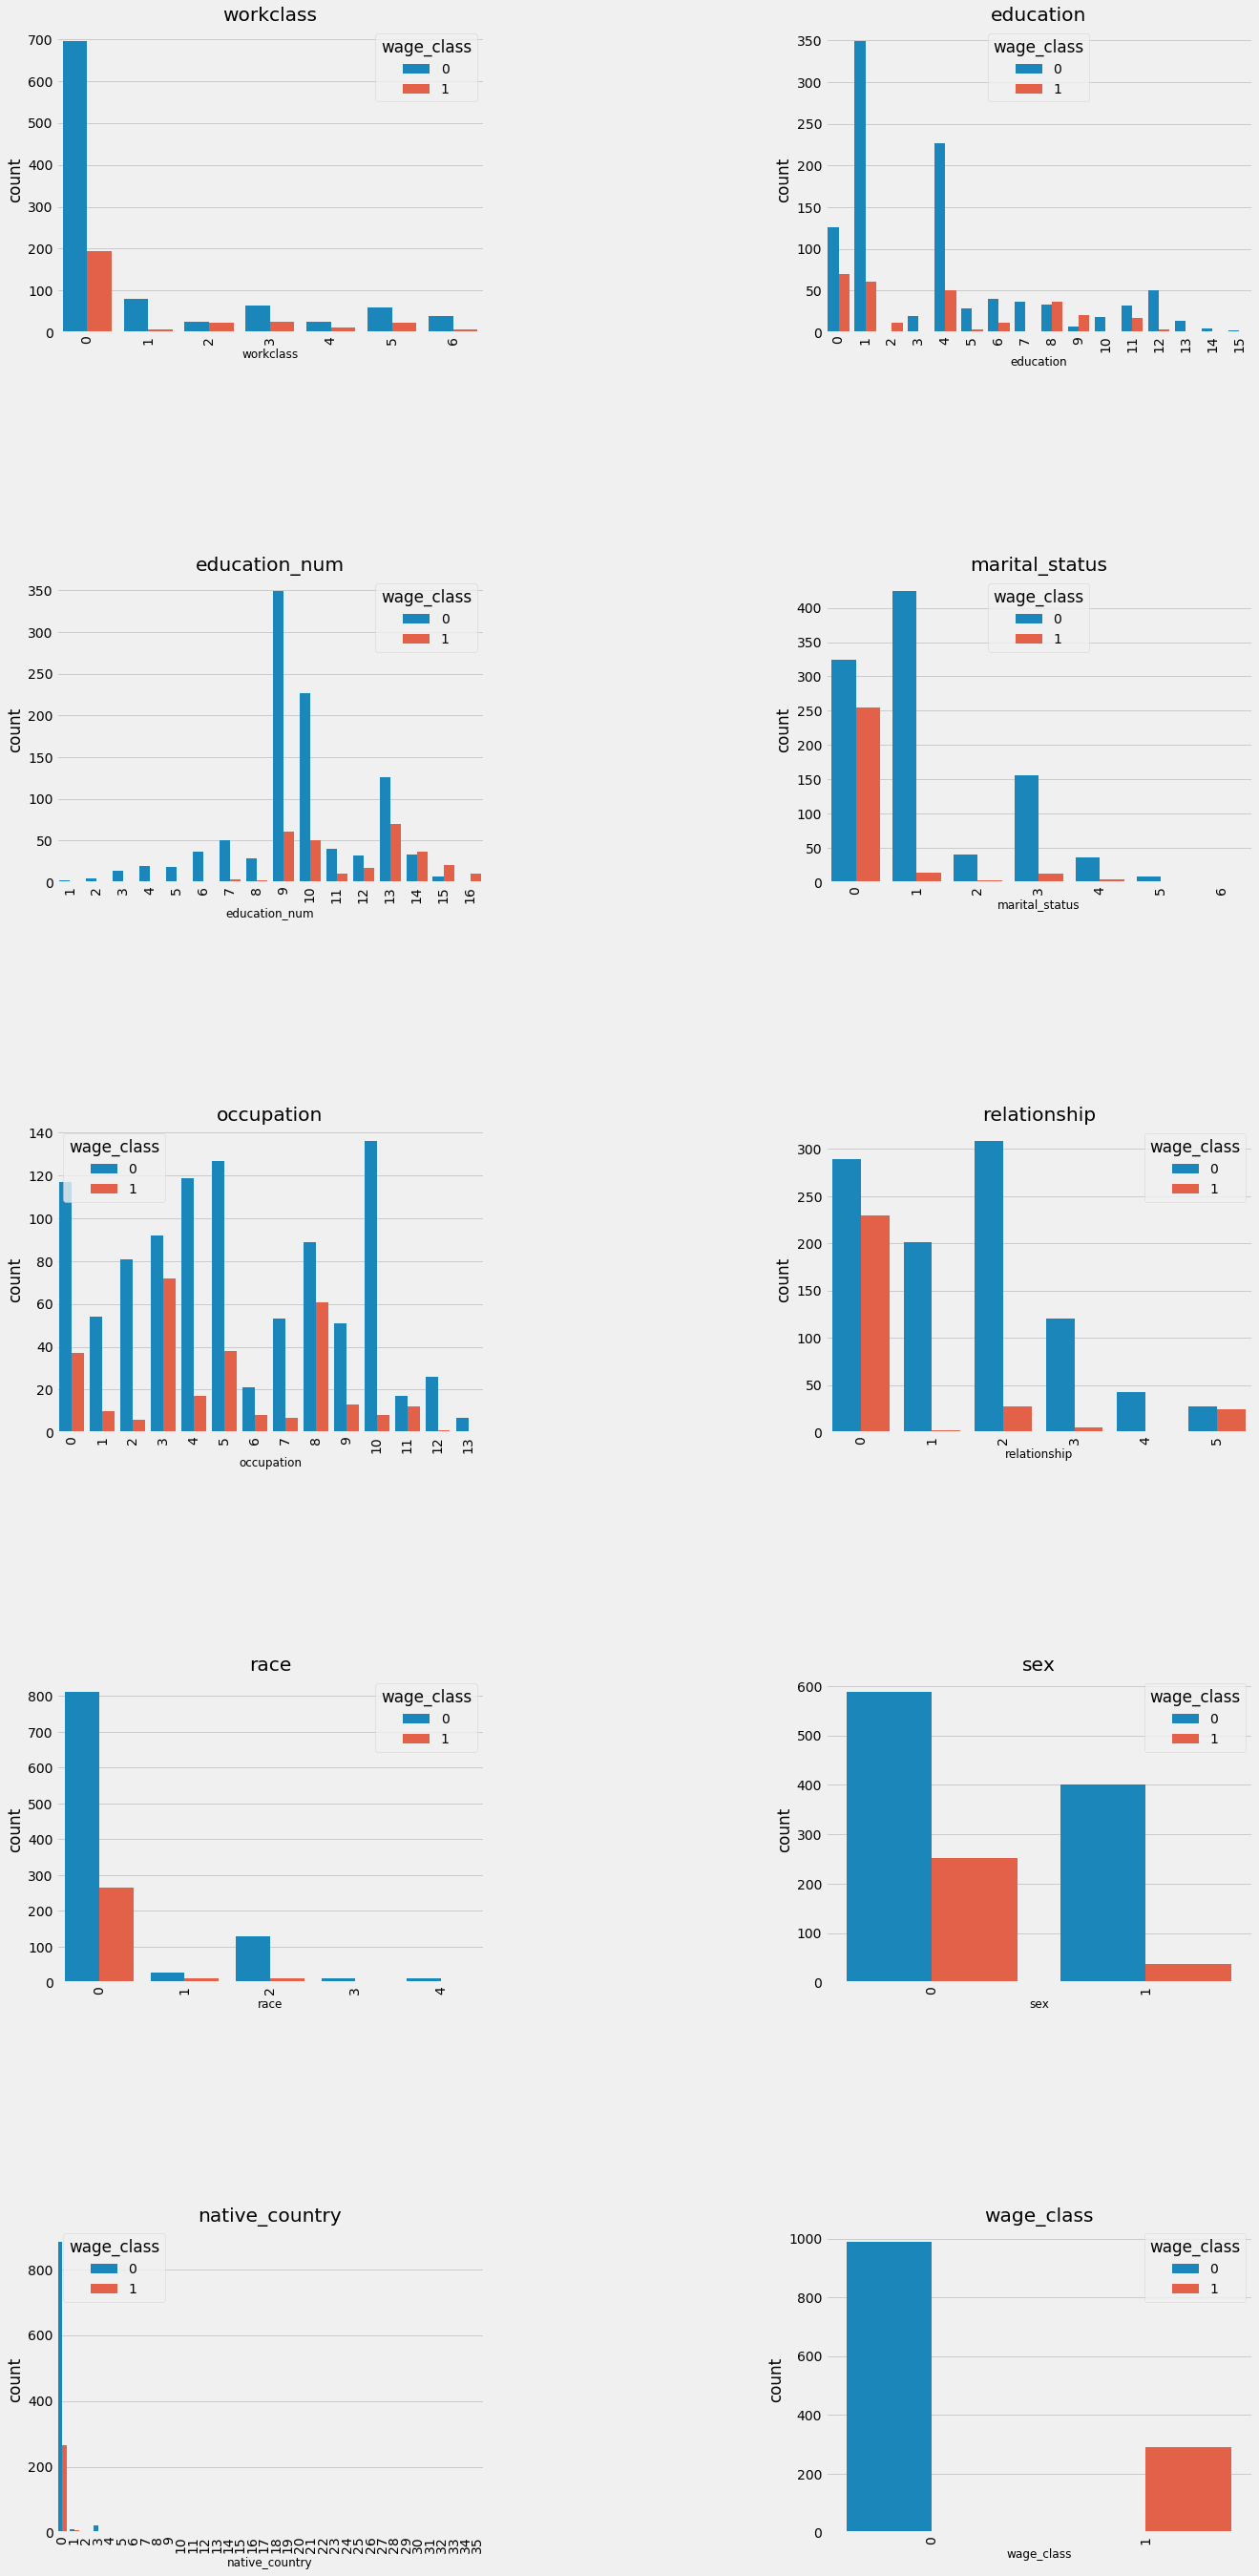

In [55]:
a.data_visualization_groupby_target(encoded_df,categorical_feature_list,cols=2, width=20, height=45, hspace=0.8, wspace=0.8)

# Single Prediction

In [33]:
import pickle
filename = 'xgboost_model.pickle'
loaded_model = pickle.load(open(filename, 'rb'))  # loading the model file from the storage
    # predictions using the loaded model file
prediction = loaded_model.predict((pd.DataFrame({'age':40,'workclass': 1,'fnlwgt':125000,'education': 0,'education_num':16,'marital_status': 0,'occupation':0, 'relationship':0,'race': 2,'sex': 0, 'capital_gain':0, 'capital_loss': 0,'hours_per_week': 50,'native_country': 0}, index = [0])))
prediction[0]

1

# Batch Prediction

In [42]:
df = pd.read_csv('test_set4.csv')
            #print(df.columns)
if 'Unnamed: 0' in df.columns:
    test_df = df.drop(['Unnamed: 0'], axis=1)
else:
    test_df = df
#print(test_df.head(2))
prepped_df_object = batch_data_prep(test_df, 20)
categorical_feature_list = prepped_df_object.categorical_feature(test_df, 20)
#prepped_df_object.data_visualization(test_df, categorical_feature_list, cols=2, width=20, height=45, hspace=0.8, wspace=0.8)
encoded_df = prepped_df_object.encoder(test_df)
encoded_df.head(2)
#prepped_df_object.data_visualization_groupby_target(encoded_df, categorical_feature_list, cols=2, width=20, height=45,
#                                                hspace=0.8, wspace=0.8)
list_of_files = os.listdir('static')
list_of_jpg_files = list_of_files[1:]
X = encoded_df.drop('wage_class', axis=1)
filename = 'xgboost_model.pickle'
loaded_model = pickle.load(open(filename, 'rb'))  # loading the model file from the storage
# predictions using the loaded model file
prediction = loaded_model.predict(X)
#prediction.map({1:'>50k',0:'<=50k'})
X['Predictions'] = pd.Series(prediction)
X['Predictions'] = X['Predictions'].map({1:'>50k',0:'<=50k'})
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Predictions
0,54,0,83103,0,13,0,0,0,0,0,0,0,67,0,>50k
1,31,0,198103,1,9,1,1,1,0,0,0,0,40,0,<=50k
2,25,1,177812,0,13,1,2,2,0,0,0,0,40,0,<=50k
3,39,2,144154,0,13,1,3,3,0,1,0,0,80,0,<=50k
4,56,0,169086,2,16,0,3,0,0,0,0,0,55,1,>50k


In [43]:
X.to_csv('result.csv')

In [44]:
def emptyTargetFiles(files_list):
    if len(files_list) > 0:
        for i in files_list:
            if 'result' in i:
                os.remove(i)
            else:
                continue

In [47]:
list_of_files = os.listdir()
list_of_files

['.gcloudignore',
 '.idea',
 '.ipynb_checkpoints',
 'adult.data',
 'adult.test',
 'app.yaml',
 'Batch_process',
 'config.ini',
 'config_reader.py',
 'full_figure_1.jpg',
 'full_figure_2.jpg',
 'Income_Prediction_Practise.ipynb',
 'main.py',
 'main_ref.py',
 'new 1.txt',
 'Procfile',
 'requirements.txt',
 'result.csv',
 'static',
 'templates',
 'test_set1.csv',
 'test_set2.csv',
 'test_set3.csv',
 'test_set4.csv',
 'xgboost_model.pickle',
 '__pycache__']

In [48]:
emptyTargetFiles(list_of_files)

In [45]:
import os
list_of_files=os.listdir('static')
list_of_files


['css', 'full_figure_1.jpg', 'full_figure_2.jpg']

In [3]:
list_of_files.remove('css')

In [6]:
list_of_files[1:]

['full_figure_1.jpg', 'full_figure_2.jpg']